In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [4]:
df.shape

(1000, 40)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.duplicated('policy_number').sum()

0

In [7]:
df.isin([' ','NA','-']).sum().any()

False

In [8]:
df.isin(['?']).sum().any()

True

- **Replace '?' with np.NaN**

In [9]:
df=df.replace('?',np.NaN)

<font size='4'>**Check Missing Value**

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<font size='4'>**Observations :-**
    
- 'property_damage','police_report_available','collision_type' contain missing values.

- _c39 columns with 100 % null value. We gone drop it.

- Other missing value feature are categorical in nature. We gone impute them with mode of that particular category.

<font size='4'>**Missing value imputation**

In [11]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [12]:
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

<font size='4'>**Missing value check after imputation**

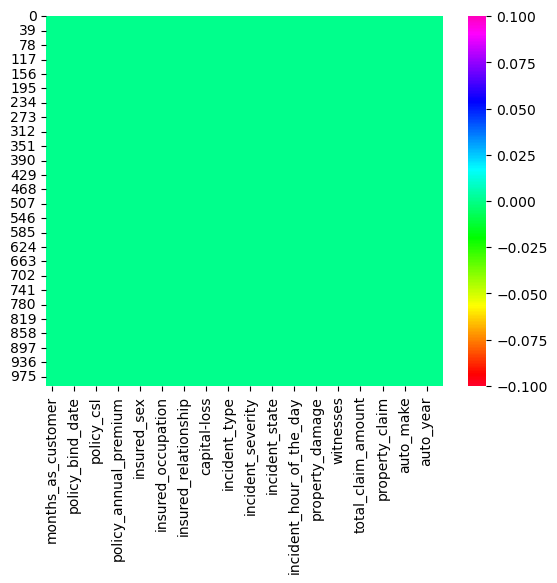

In [13]:
sns.heatmap(df.isnull(),cmap="gist_rainbow")
plt.show()

- **Finally, No Missing Value is Present.**

<font size='4'>**Details on Policy_csl column :-**

- **Combined single limit (CSL):** CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.

- In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.

- **We will split this column into two CSL columns for person and accident.**

In [14]:
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [15]:
df.drop("policy_csl",axis=1,inplace=True)

**We have two feature here with datetime datatypes. We gone split them in terms of date,month and year.**

In [16]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [17]:
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [18]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [19]:
df.drop(['incident_year'],axis=1,inplace=True)

**We have one column name as 'auto_year' which depict year from which Automobile in operational on road. In simple word Automobile age. Here we will do some simple feature engineering to create new columns with automobile age and drop eariler.**

**As incident year is 2015, we will use 2015 as base year for new column creation.**

In [20]:
df['Automobile_Age']=2015 - df['auto_year']

df.drop("auto_year",axis=1,inplace=True)

<font size='3'>**Spliting feature in Categorical and Numerical variable**

In [21]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [22]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

<font size='5'>**Statistical Matrix**

In [23]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='tab10')

In [24]:
df[Category].describe().T.style.background_gradient(cmap='winter_r')

<font size='4'>**Enlisting Value counts & Sub-categories of different categorial features available**

In [25]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

<font size='4'>**Explore Target variable**

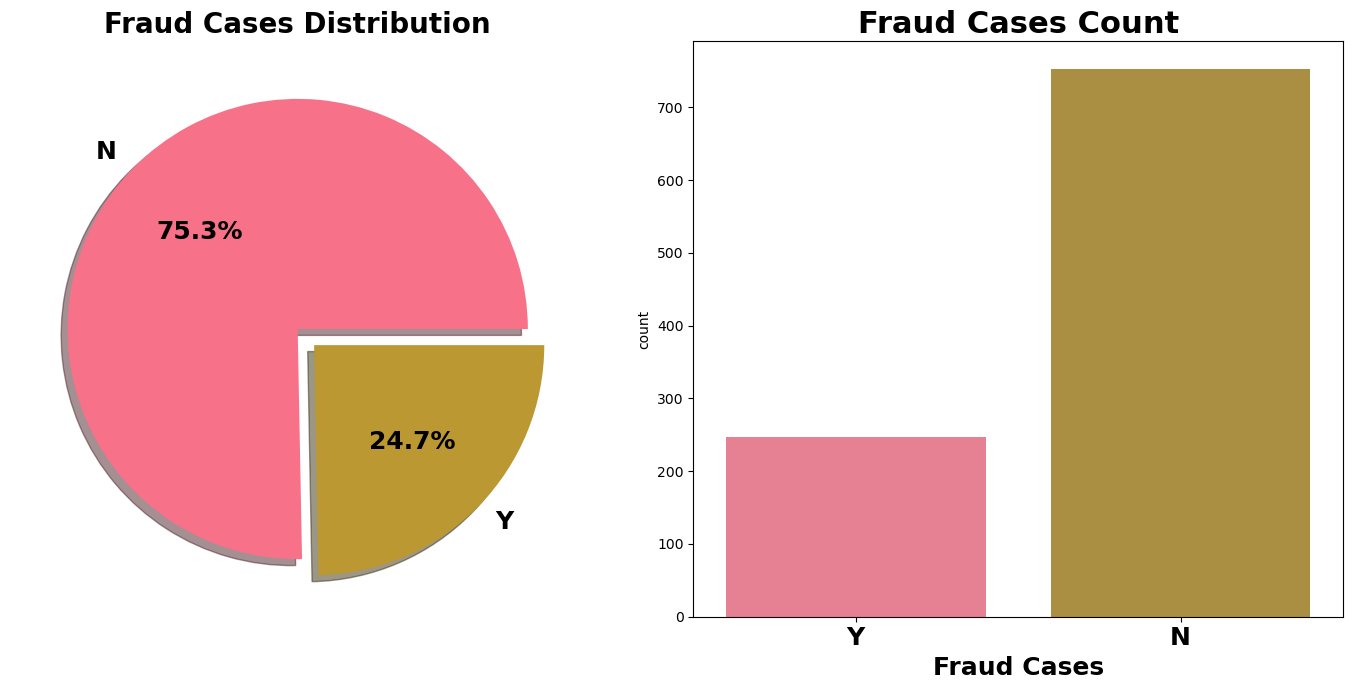

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,7))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Fraud Cases Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='fraud_reported',data=df,ax=ax[1])
ax[1].set_title('Fraud Cases Count',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Fraud Cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

<font size='4'>**Observations :-**

- Out of all cases around 24.7 % cases are Fraud.

- 'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

<font size='4'>**Analysing Age vs Fraud**

In [27]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


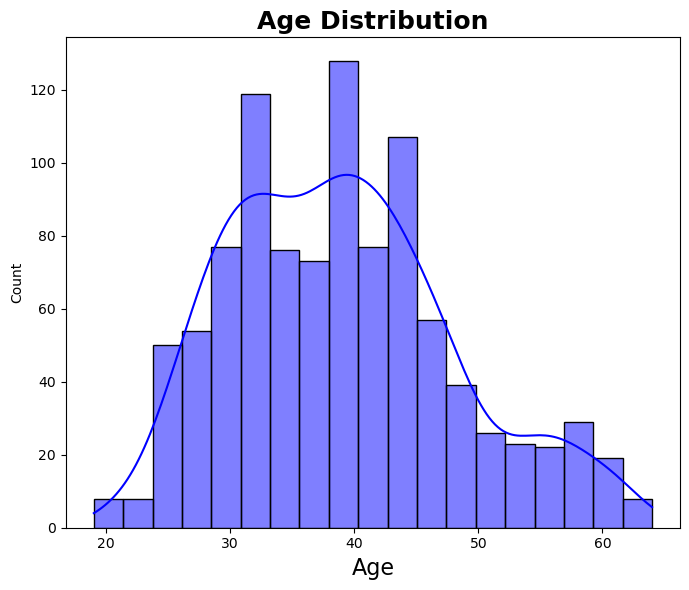

In [28]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [29]:
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

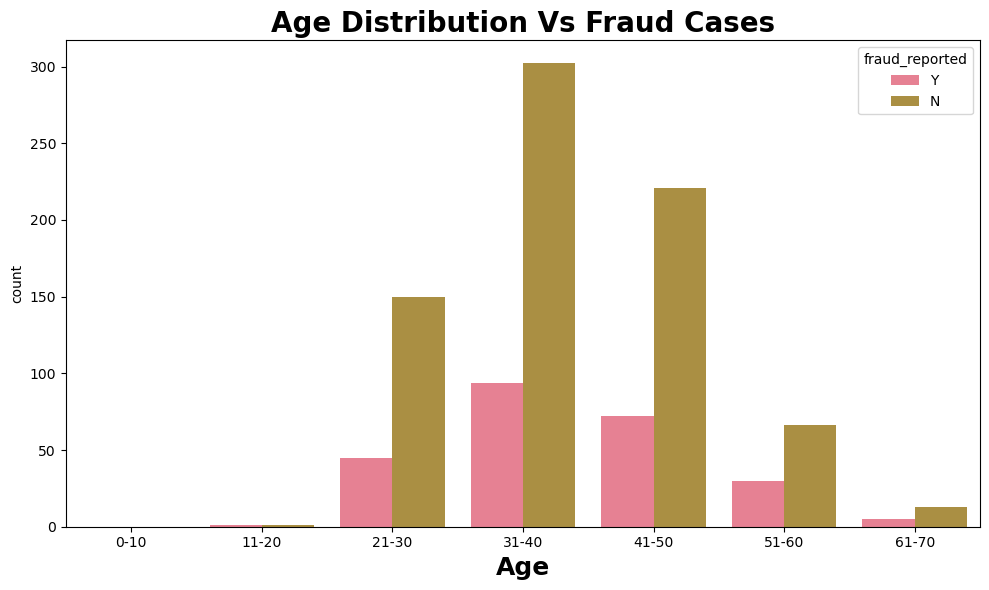

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

<font size='4'>**Observations :-**

- Maximum fraud cases comes from people with age group of 31-50 year.

- Very few cases in 60+ year old peoples.

<font size='4'>**Policy State Vs Fraud cases**

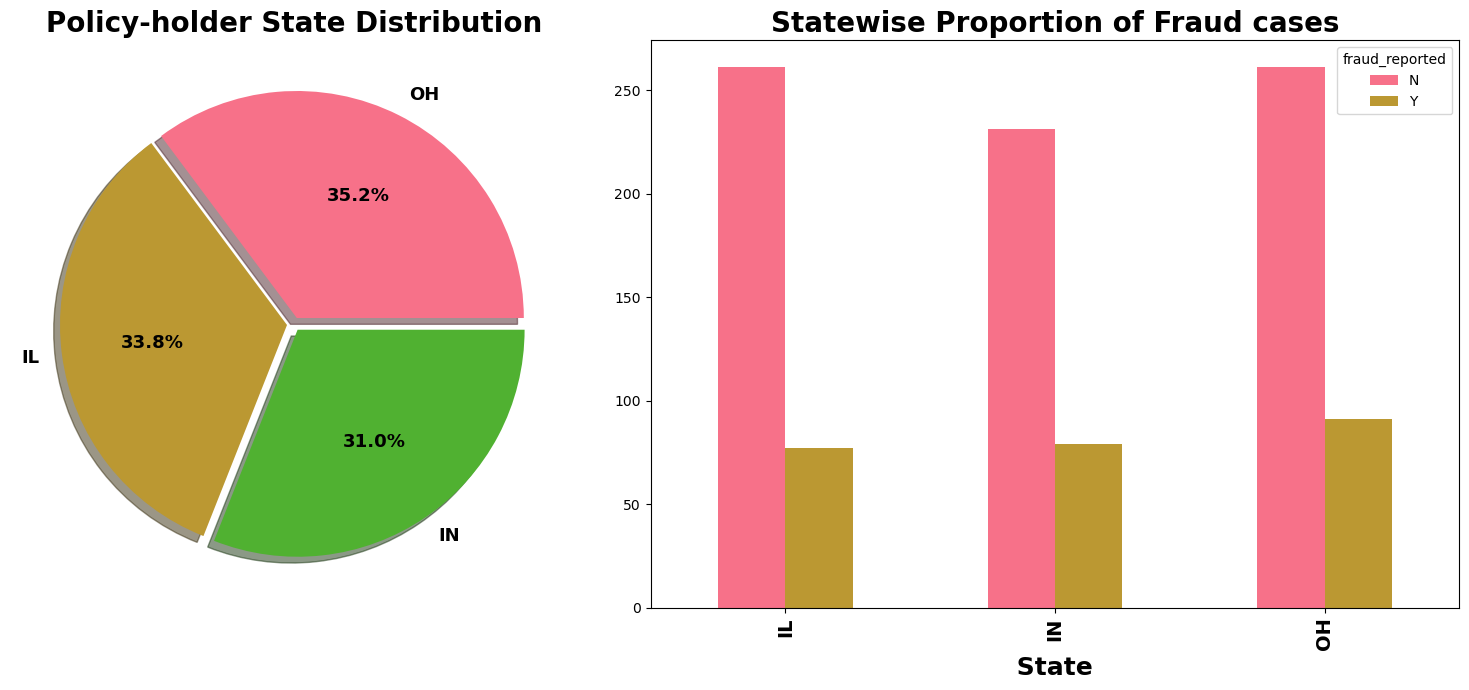

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

<font size='4'>**Observations :-**

- Almost same amout of cases come from each state.

- Maximum fraud cases come from state of Ohio.

<font size='4'>**Insured Gender VS Fraud cases**

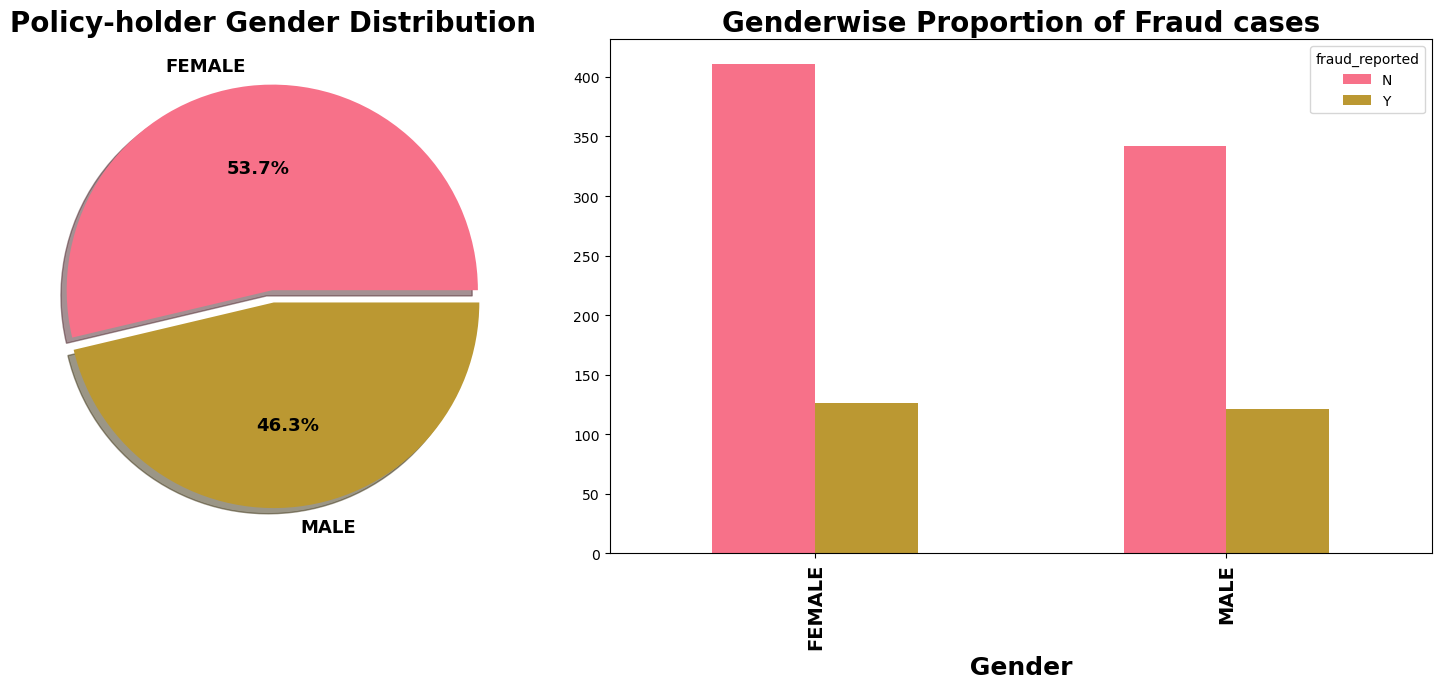

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

<font size='4'>**Observations :-**
    
- Number of claims come from female is higher than which reported by male insured.

- Almost same amount of fraud cases comes from same gender.

<font size='4'>**Education_level vs Fraud cases**

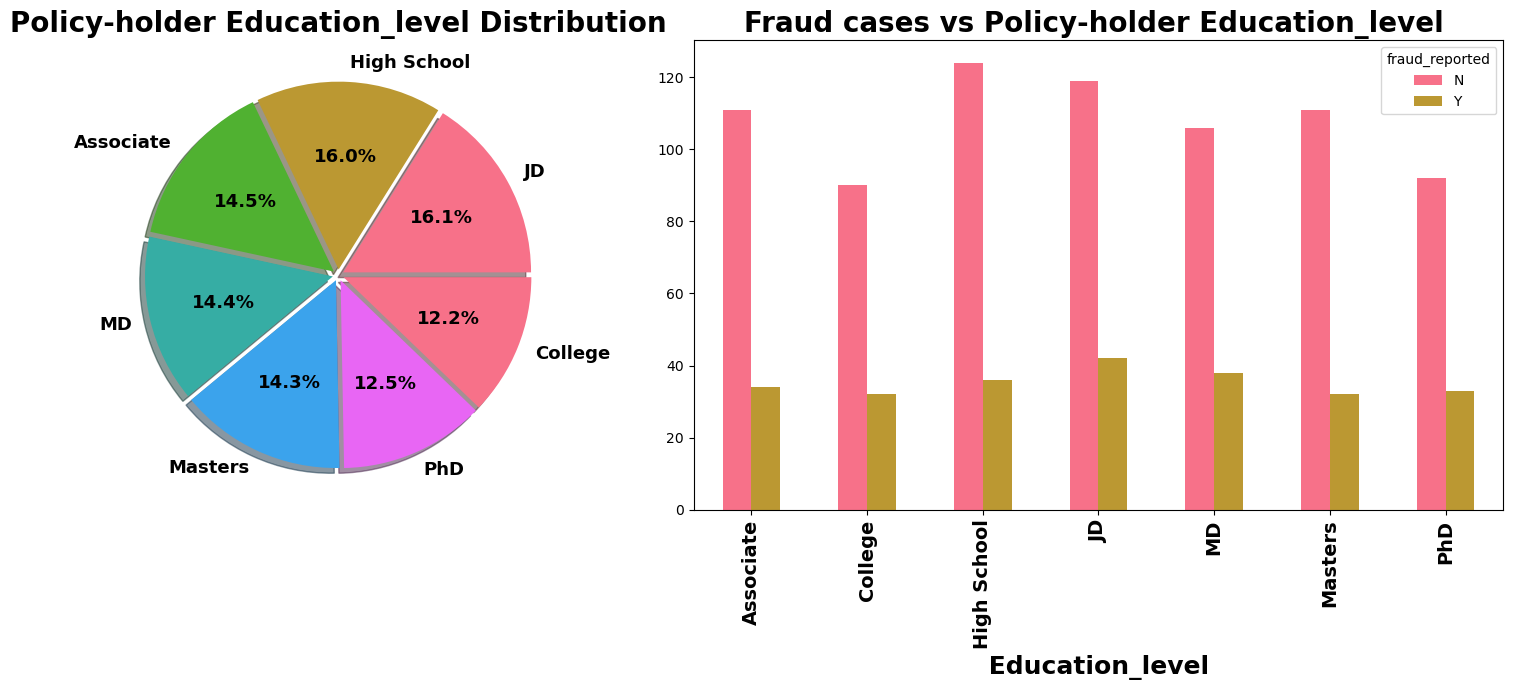

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**We can see tendency to make fraud claims has across every education backgroud, even in Masters,PhD. Education Level is not much important variable for us !**

<font size='4'>**Occupation of Insured Customers**

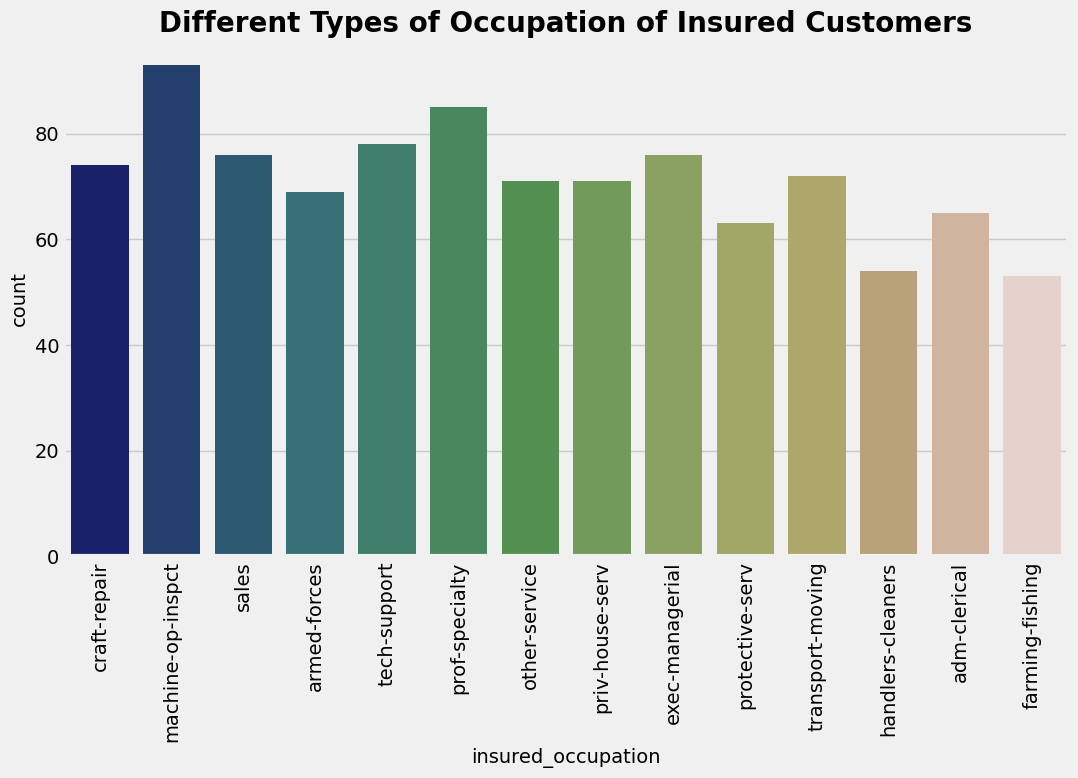

In [34]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(x=df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

<font size='3'>**Hobbies of Insured Customers**

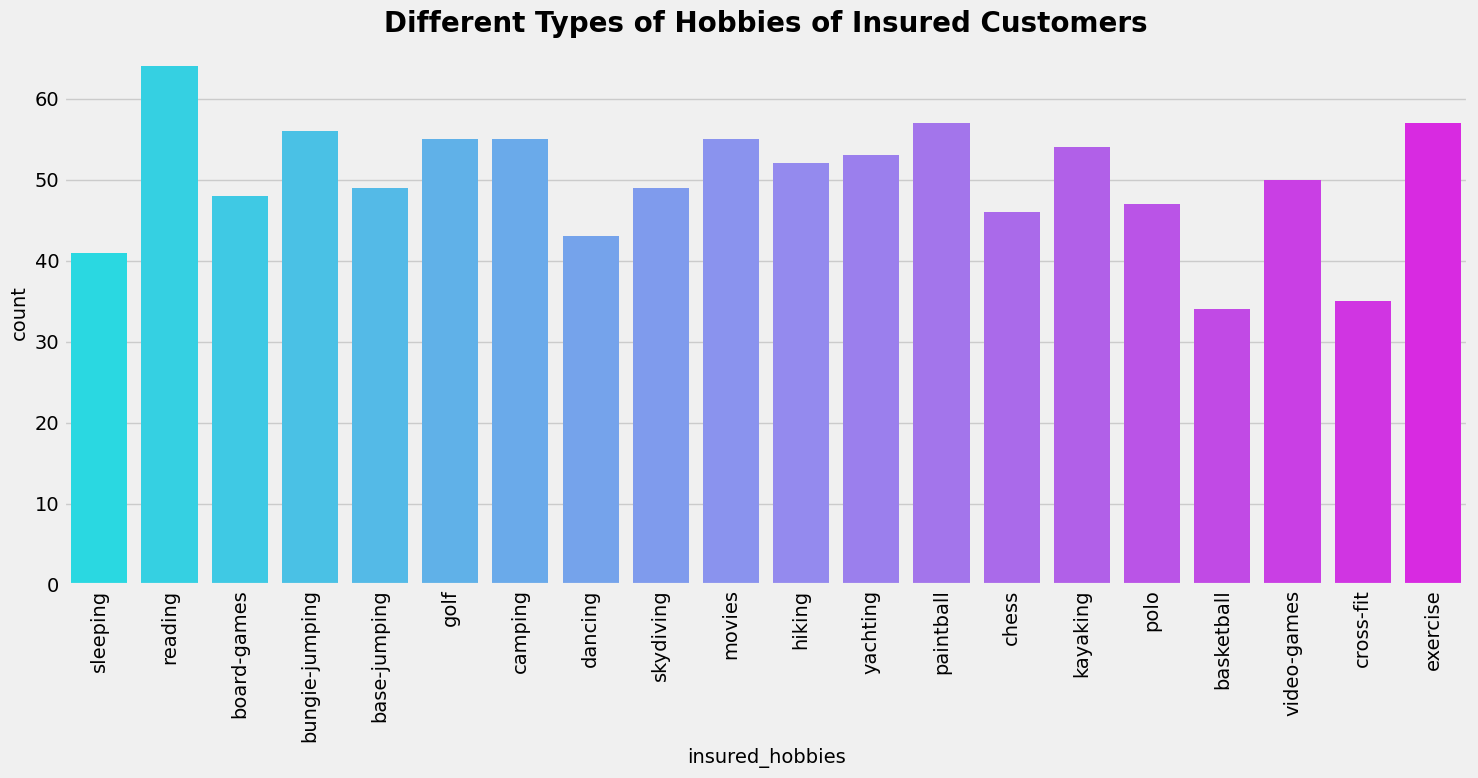

In [35]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(x=df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

<font size='4'>**Incidents vs Fraud cases**

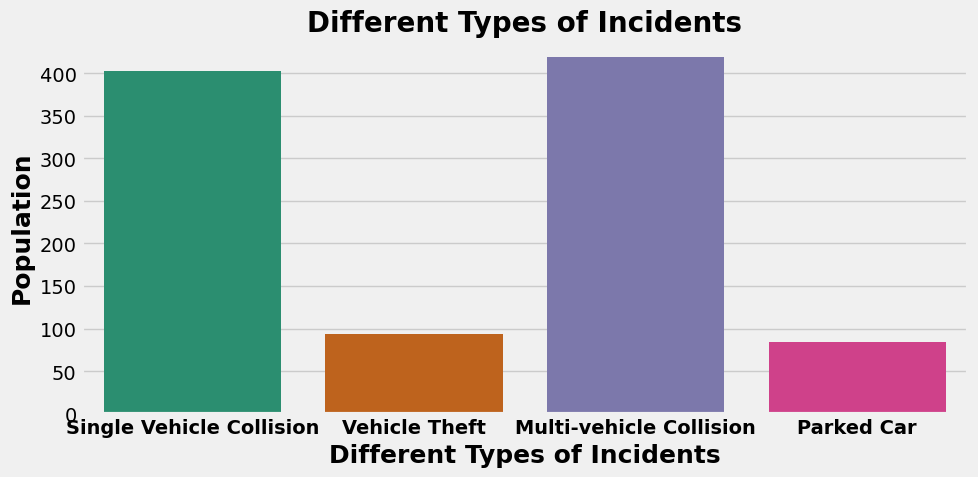

In [36]:
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(x=df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

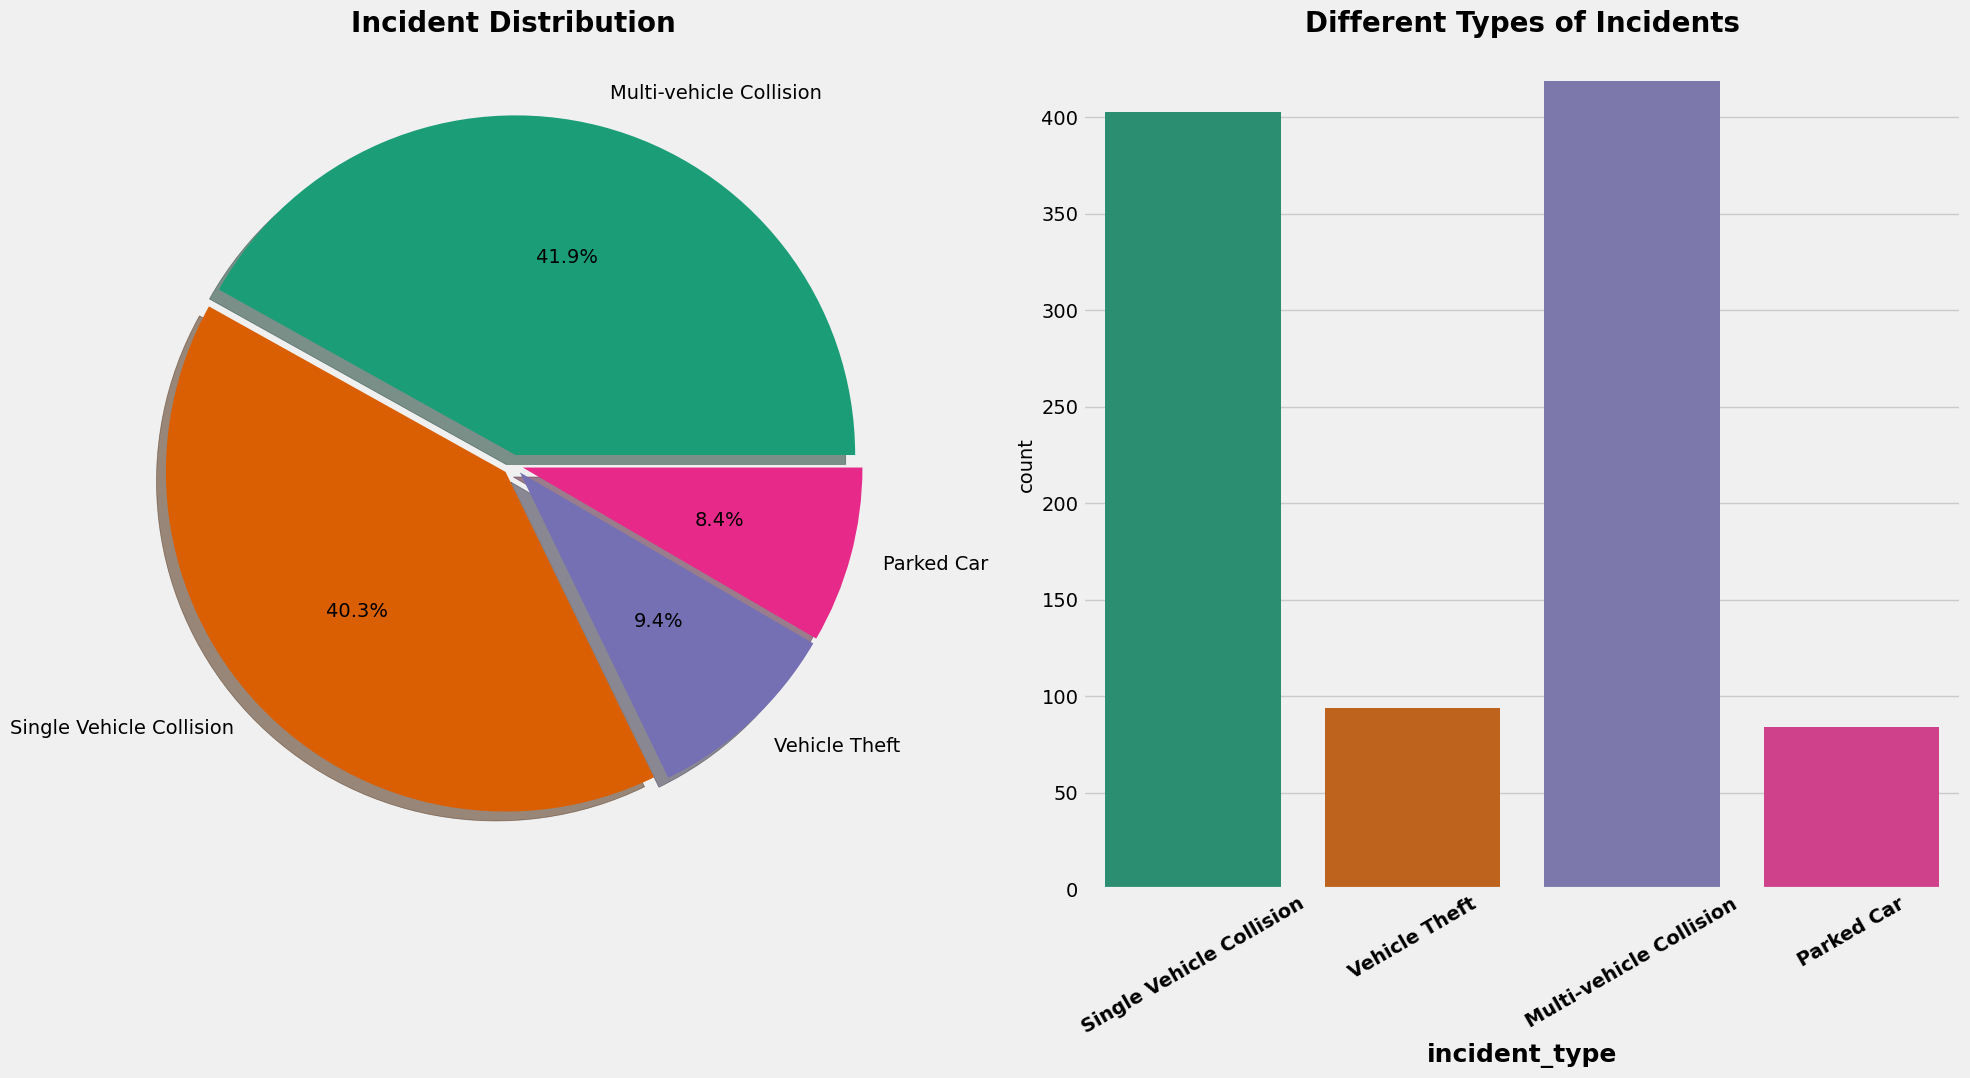

In [37]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
f,ax=plt.subplots(1,2,figsize=(20,11))
df['incident_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%3.1f%%',
                                          textprops ={ 'fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Incident Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='incident_type',data=df,ax=ax[1])
ax[1].set_title('Different Types of Incidents',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_type",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.tight_layout()
plt.show()

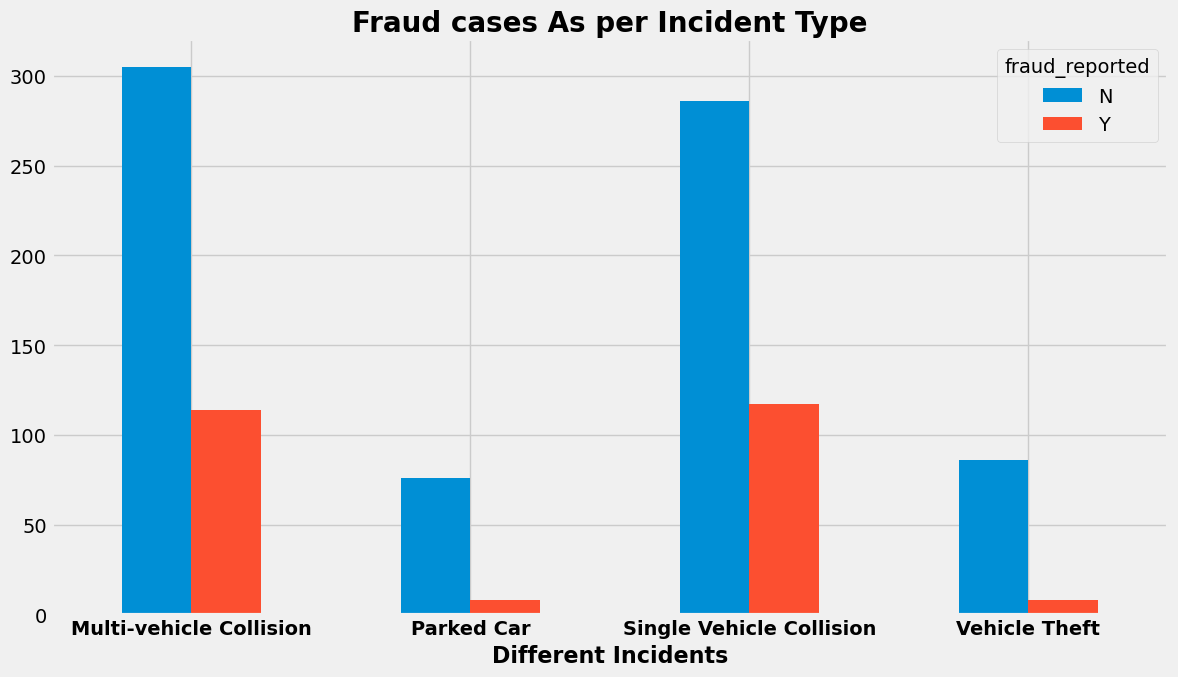

In [38]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show()

<font size='4'>**Observations :-**

- Most of case comes from Multi-vehicle and single vehicle collision.

- Some claims are due to automobile robbery.

- ** claim out of three claim is fraud in multi or single vehicle collision incident.**

    

**It will be interesting to figure out collision type and severity for different incident and corresponding fraud claim.**

<font size='4'>**Explore different Collision**

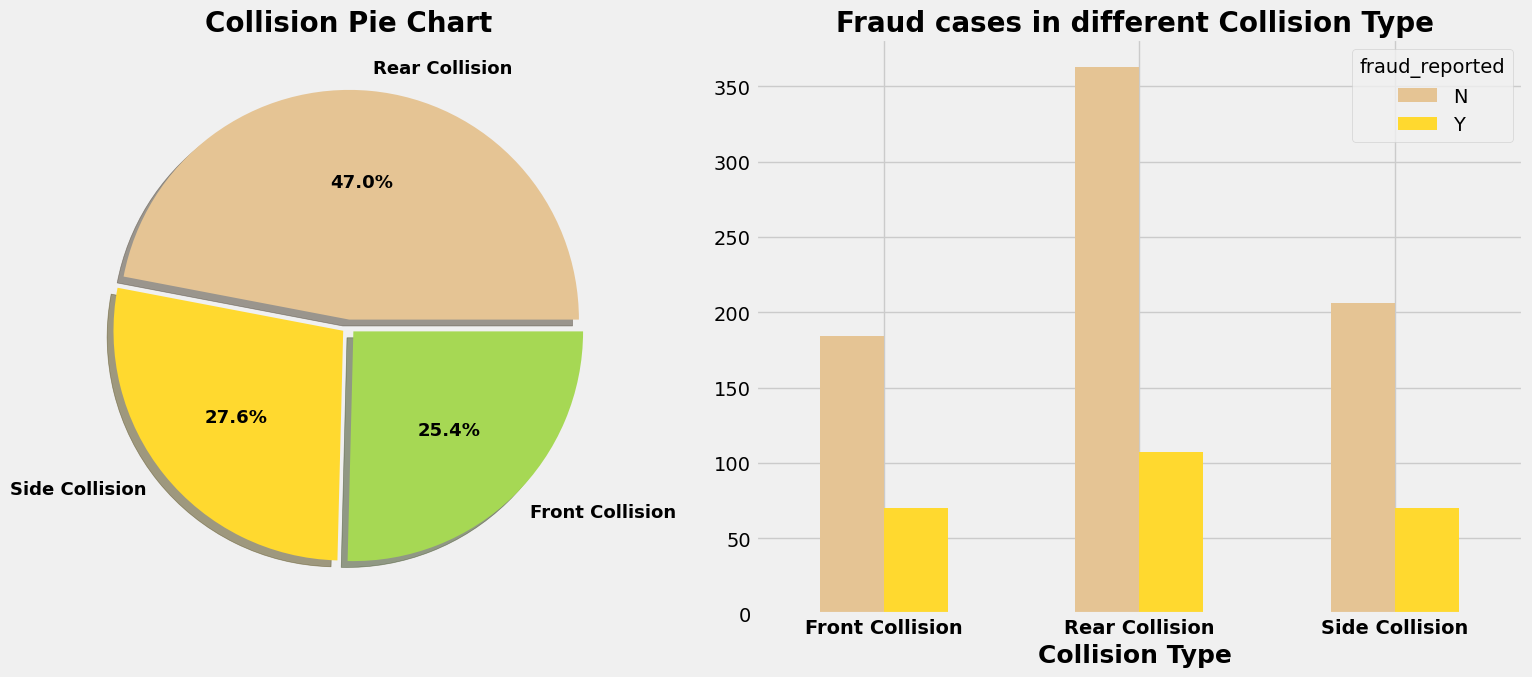

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases in different Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

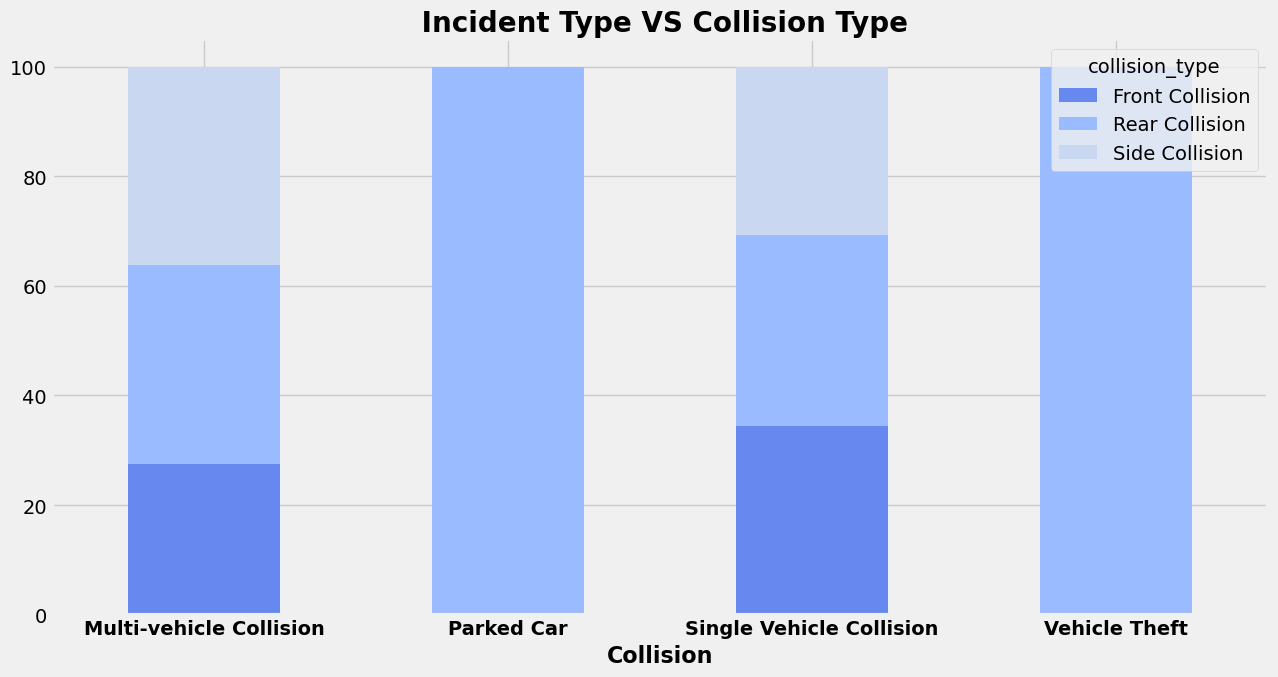

In [40]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

<font size='4'>**Collision VS Incident Severity**

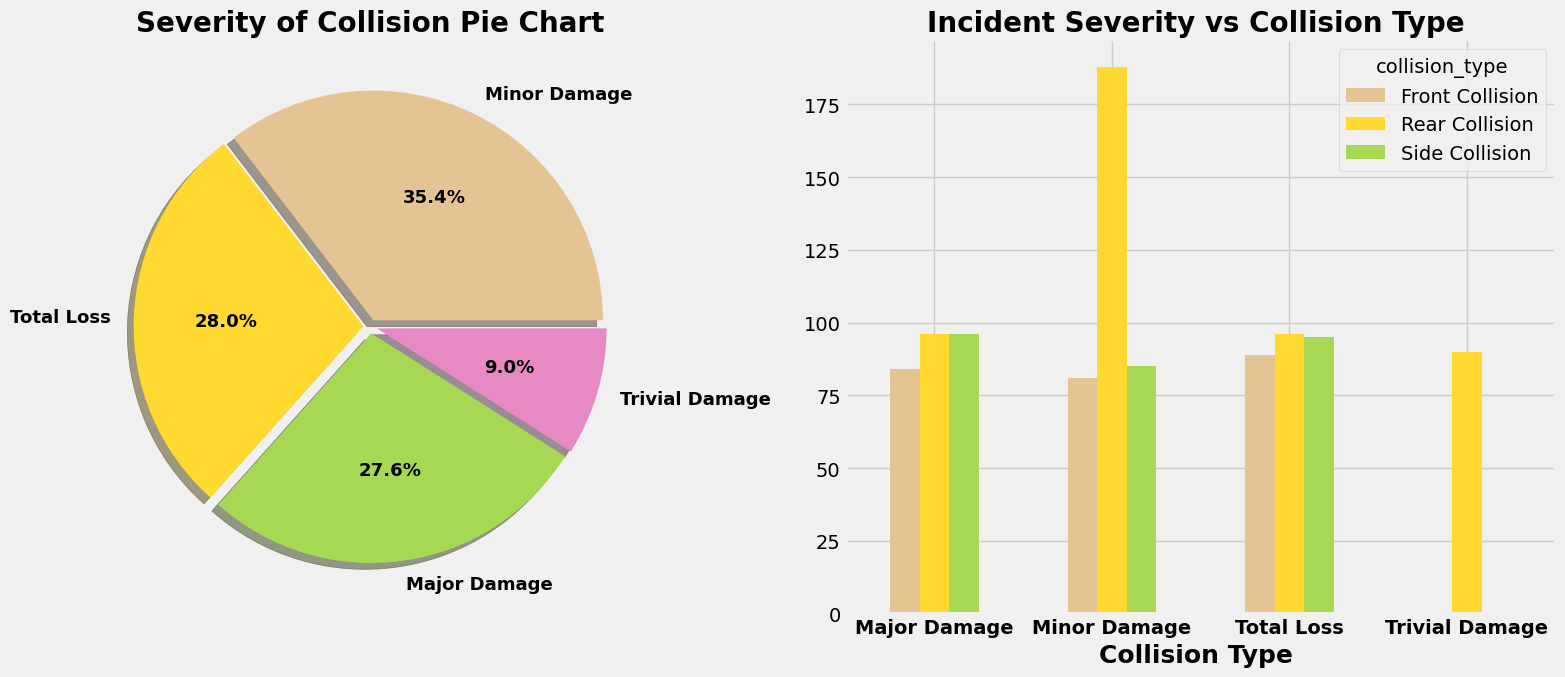

In [41]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

<font size='4'>**Incident Type VS Severity of Collision**

In [42]:
pd.crosstab(df['incident_type'], df['incident_severity']).style.background_gradient(cmap='Blues')

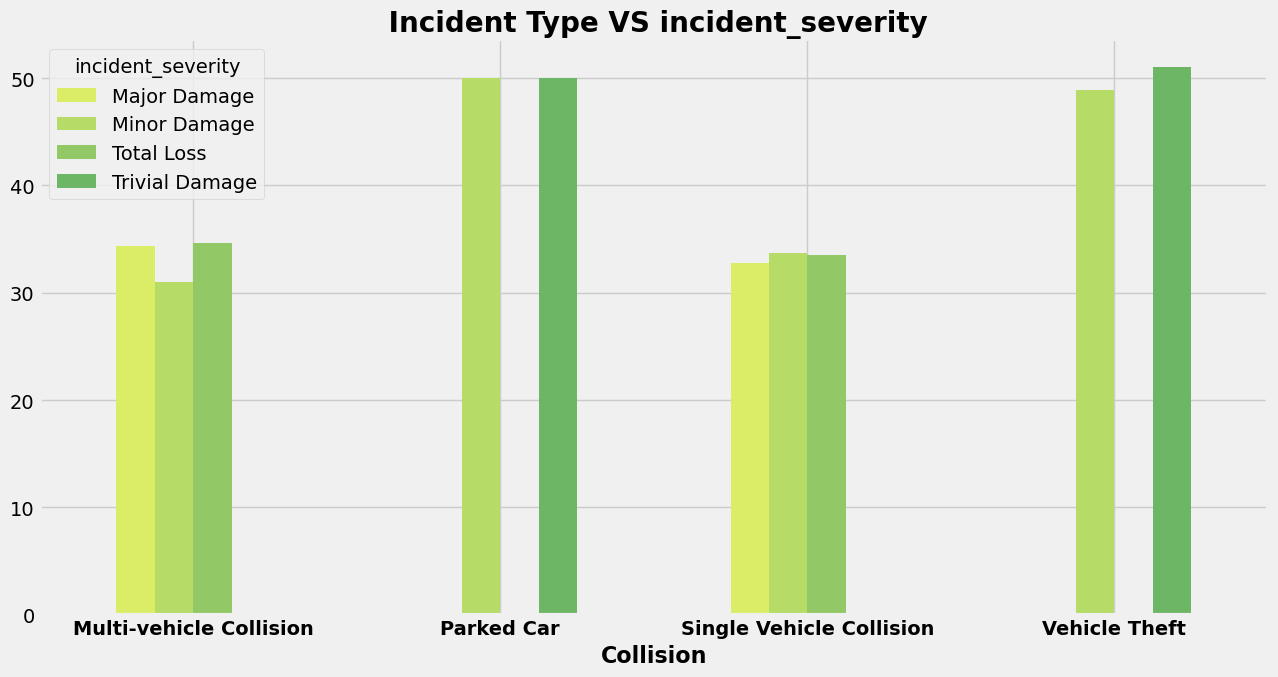

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

**It seem like incident Type is important variable for us. Now is time to dive deep to get more insight on incident type by visualise incident type with Numerical features.**

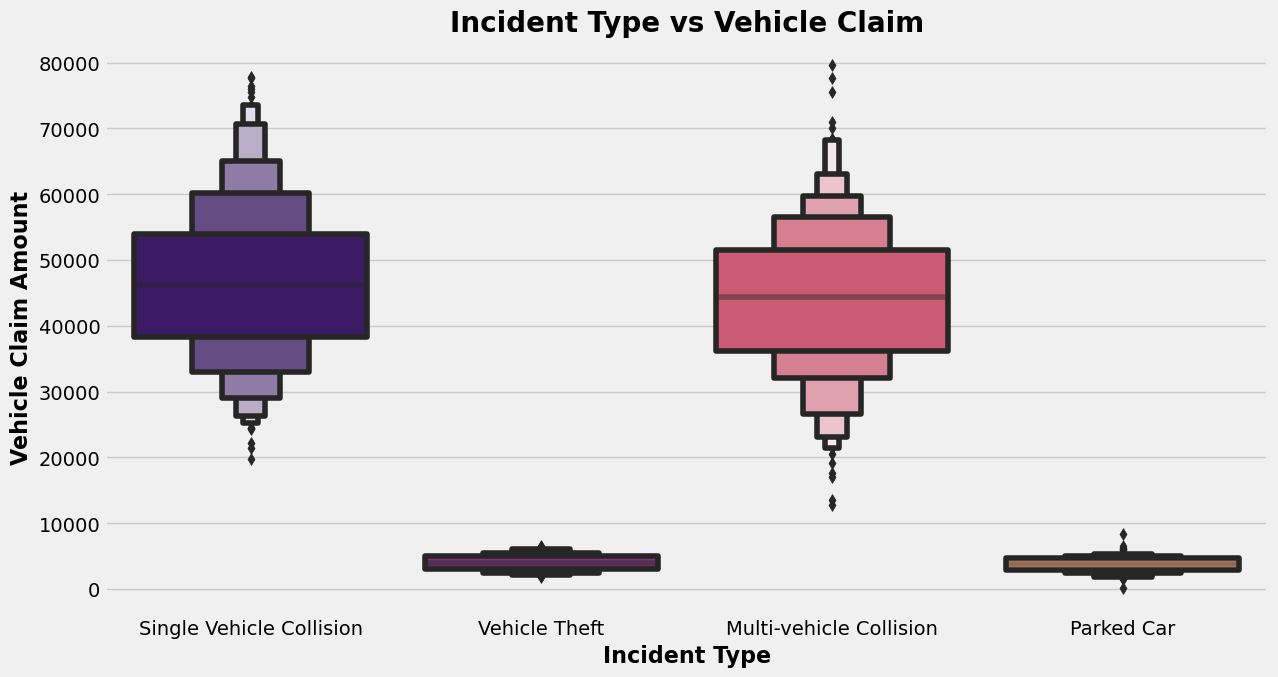

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(x=df['incident_type'], y=df['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

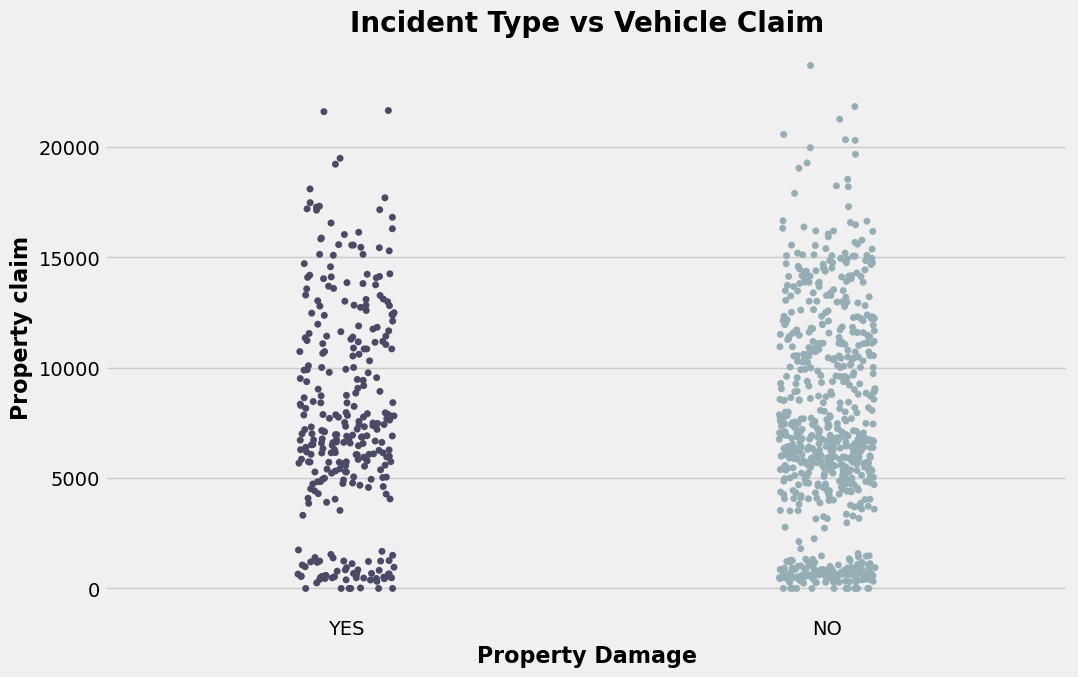

In [45]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(x=df['property_damage'], y=df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()

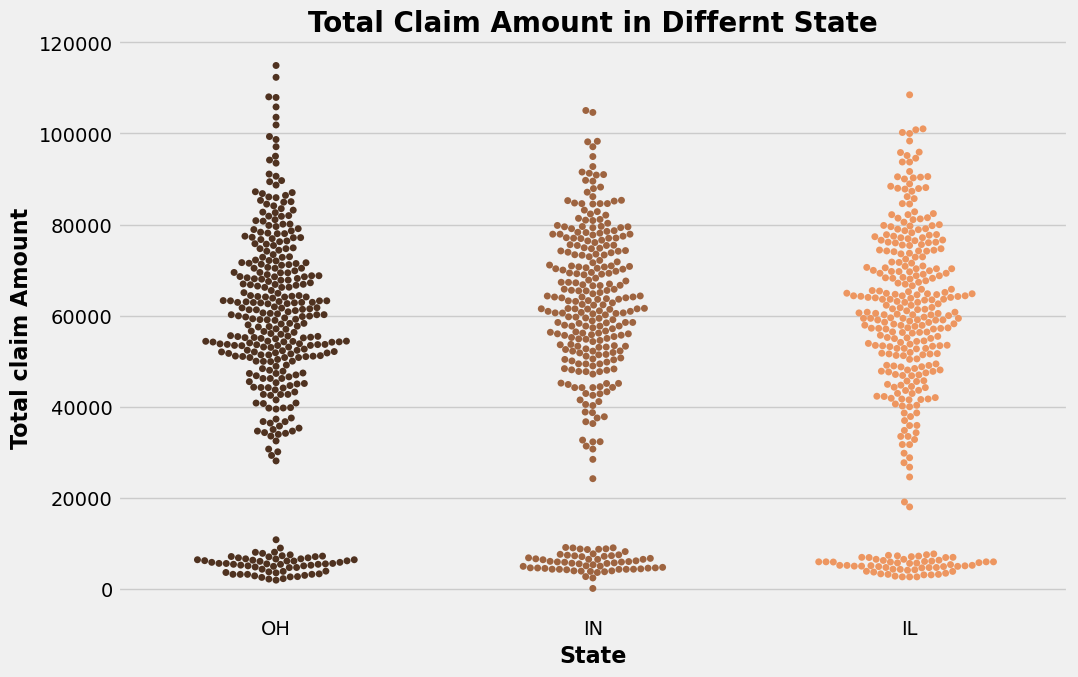

In [46]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(x=df['policy_state'], y=df['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=20,fontweight ='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Total claim Amount', fontsize=16,fontweight='bold')
plt.show()

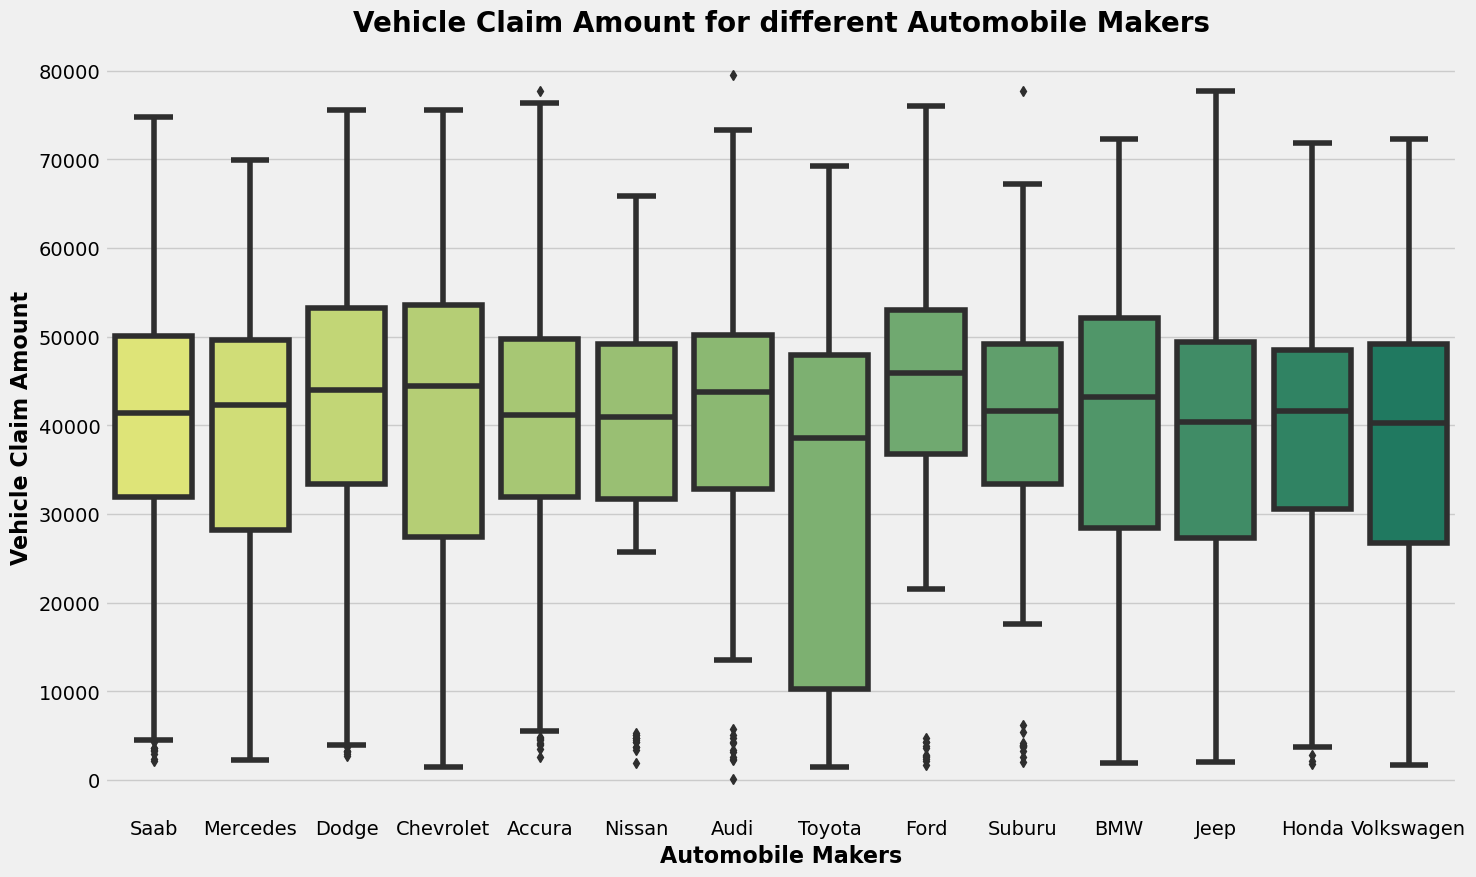

In [47]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(x=df['auto_make'], y=df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

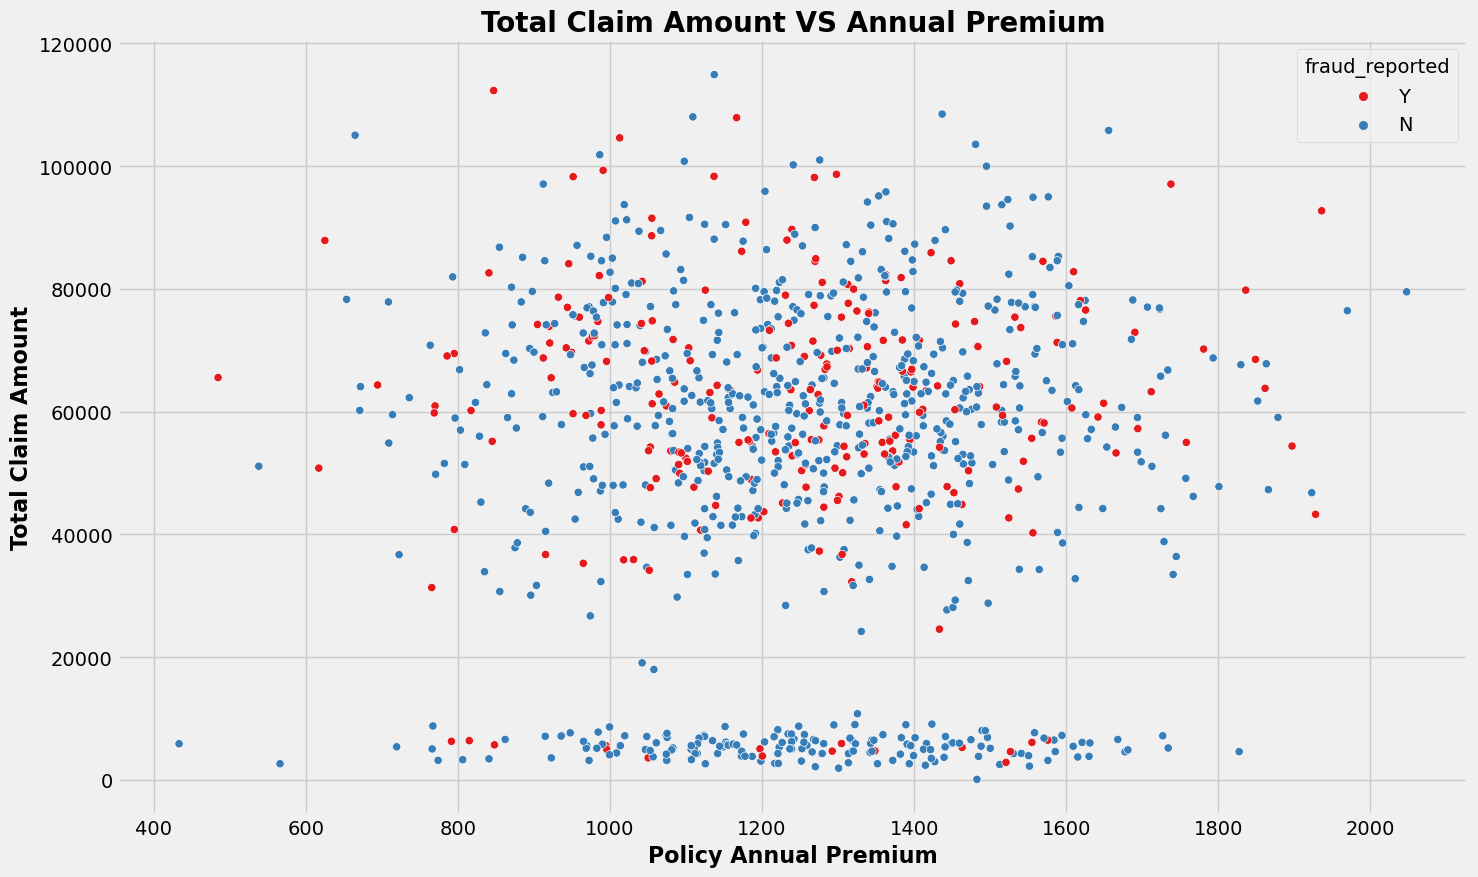

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(x=df['policy_annual_premium'], y=df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

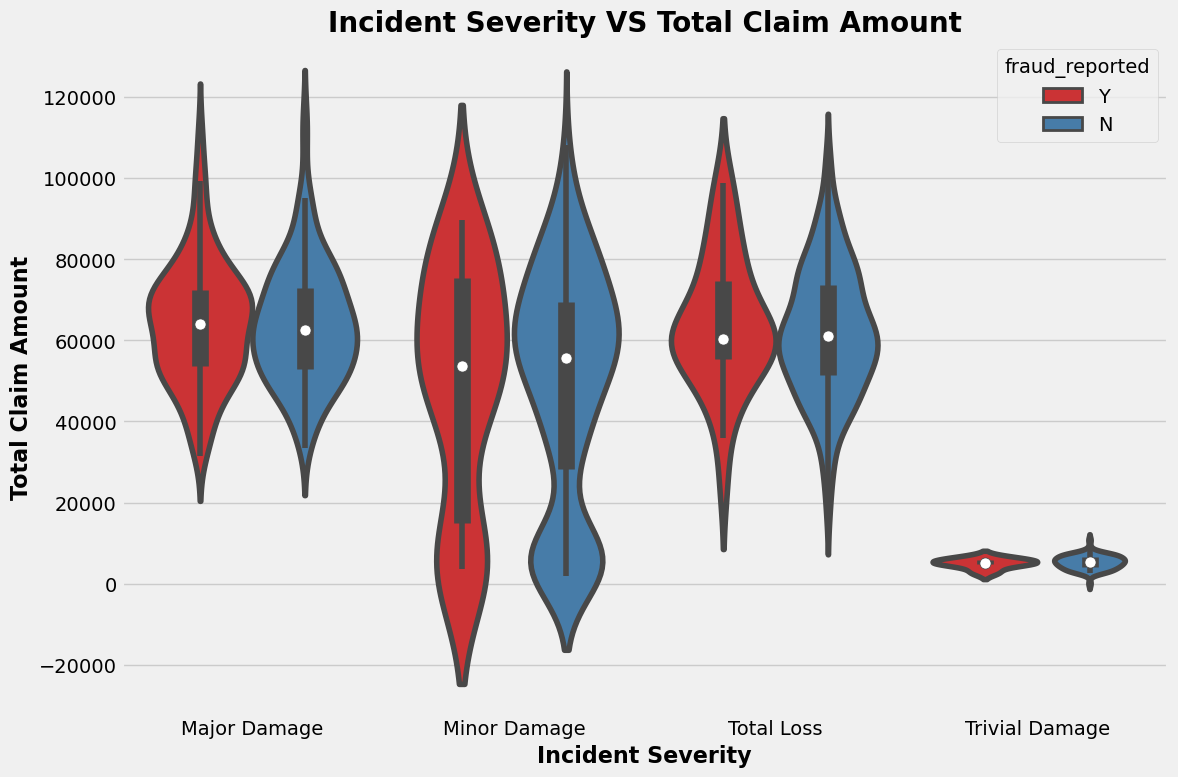

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.violinplot(x=df['incident_severity'], y=df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Incident Severity VS Total Claim Amount',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

In [50]:
pd.set_option('display.max_columns', None)
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

  fraud_reported CSL_Personal CSL_Accidental  policy_bind_day  \
0              Y          250            500               17   
1              Y          250            500               27   
2              N          100            300                9   
3              Y          250            500               25   
4              N          500           1000                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              2014            25      

In [51]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

<font size='5'>**Encoding Categorical Data**

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  fraud_reported  CSL_Personal  CSL_Accidental  policy_bind_day  \
0           1               1             1               2               17   
1          12               1             1               2               27   
2          30               0             0               1                9   
3          34               1             1               2               25   
4          31               0             2               0                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              

<font size='5'>**Outliers**
    

**Detection and Removal**

In [53]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [54]:
len(Numerical)

21

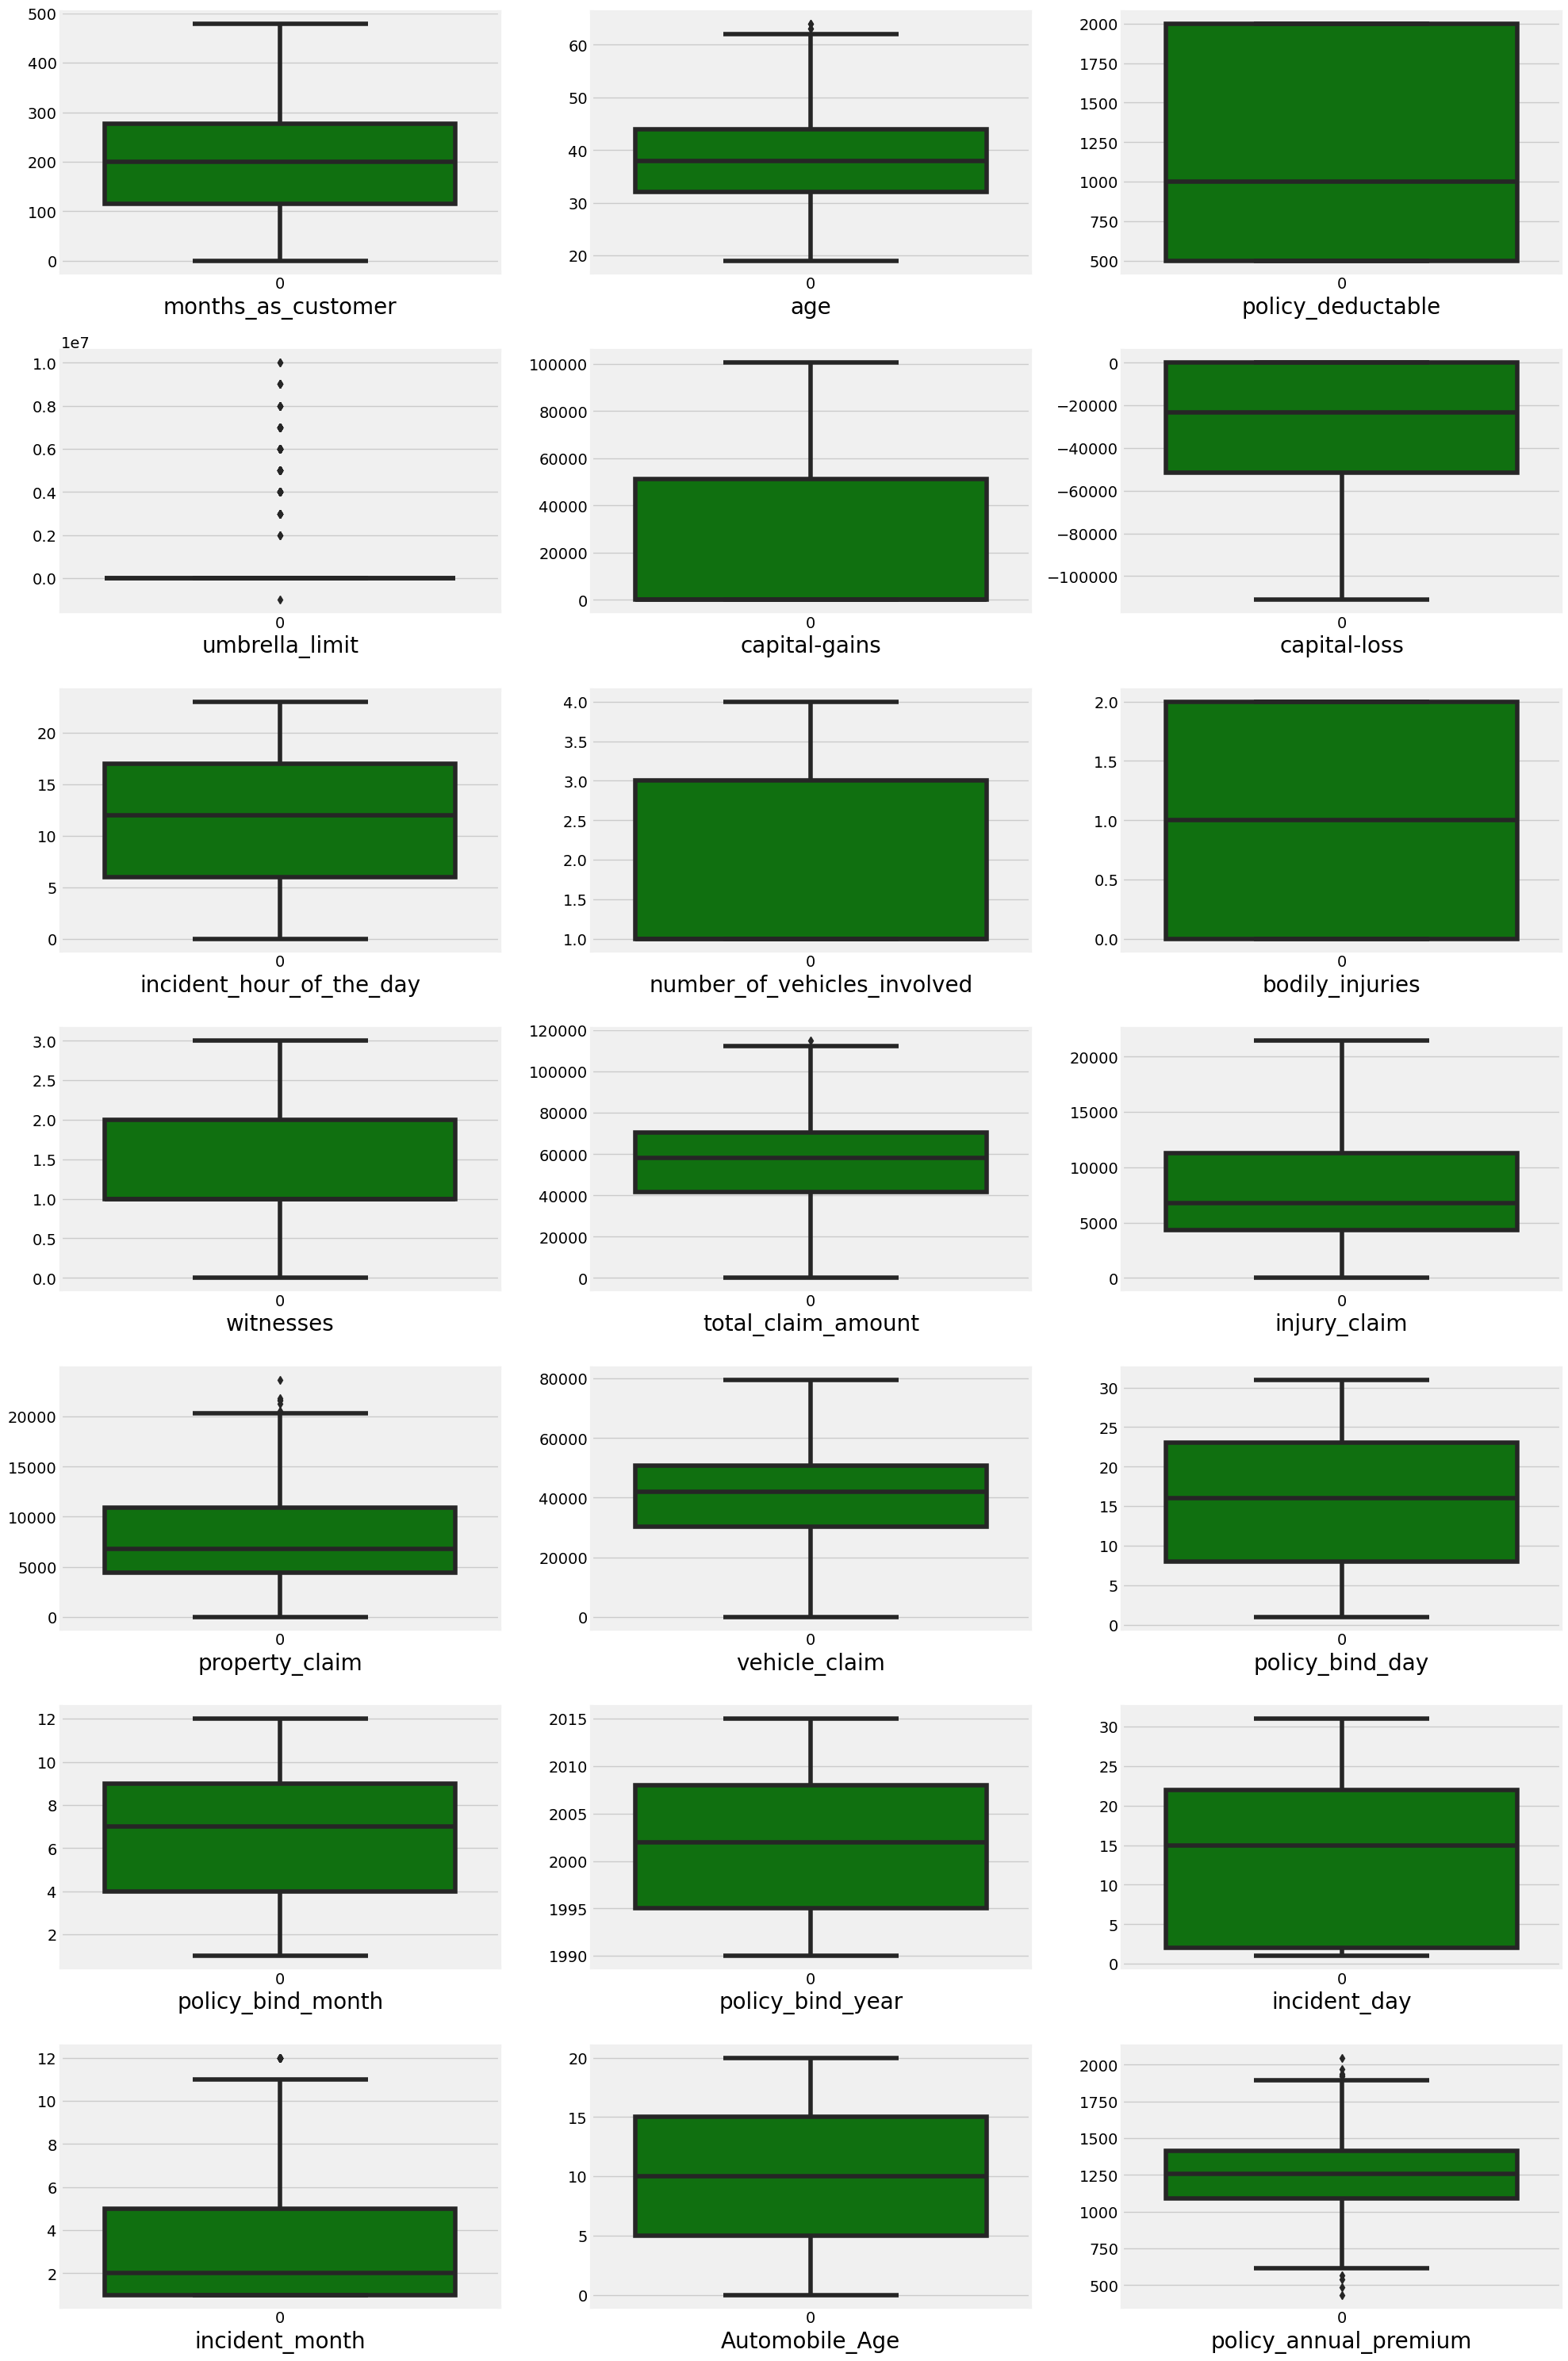

In [55]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- **From Boxplot we can see outliers exist dataset.**

In [56]:
df.drop(['age_bins'],axis=1,inplace=True)

<font size='4'>**Outliers removal using Zscore method**

In [57]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


<font size='5'>**SKEWNESS**

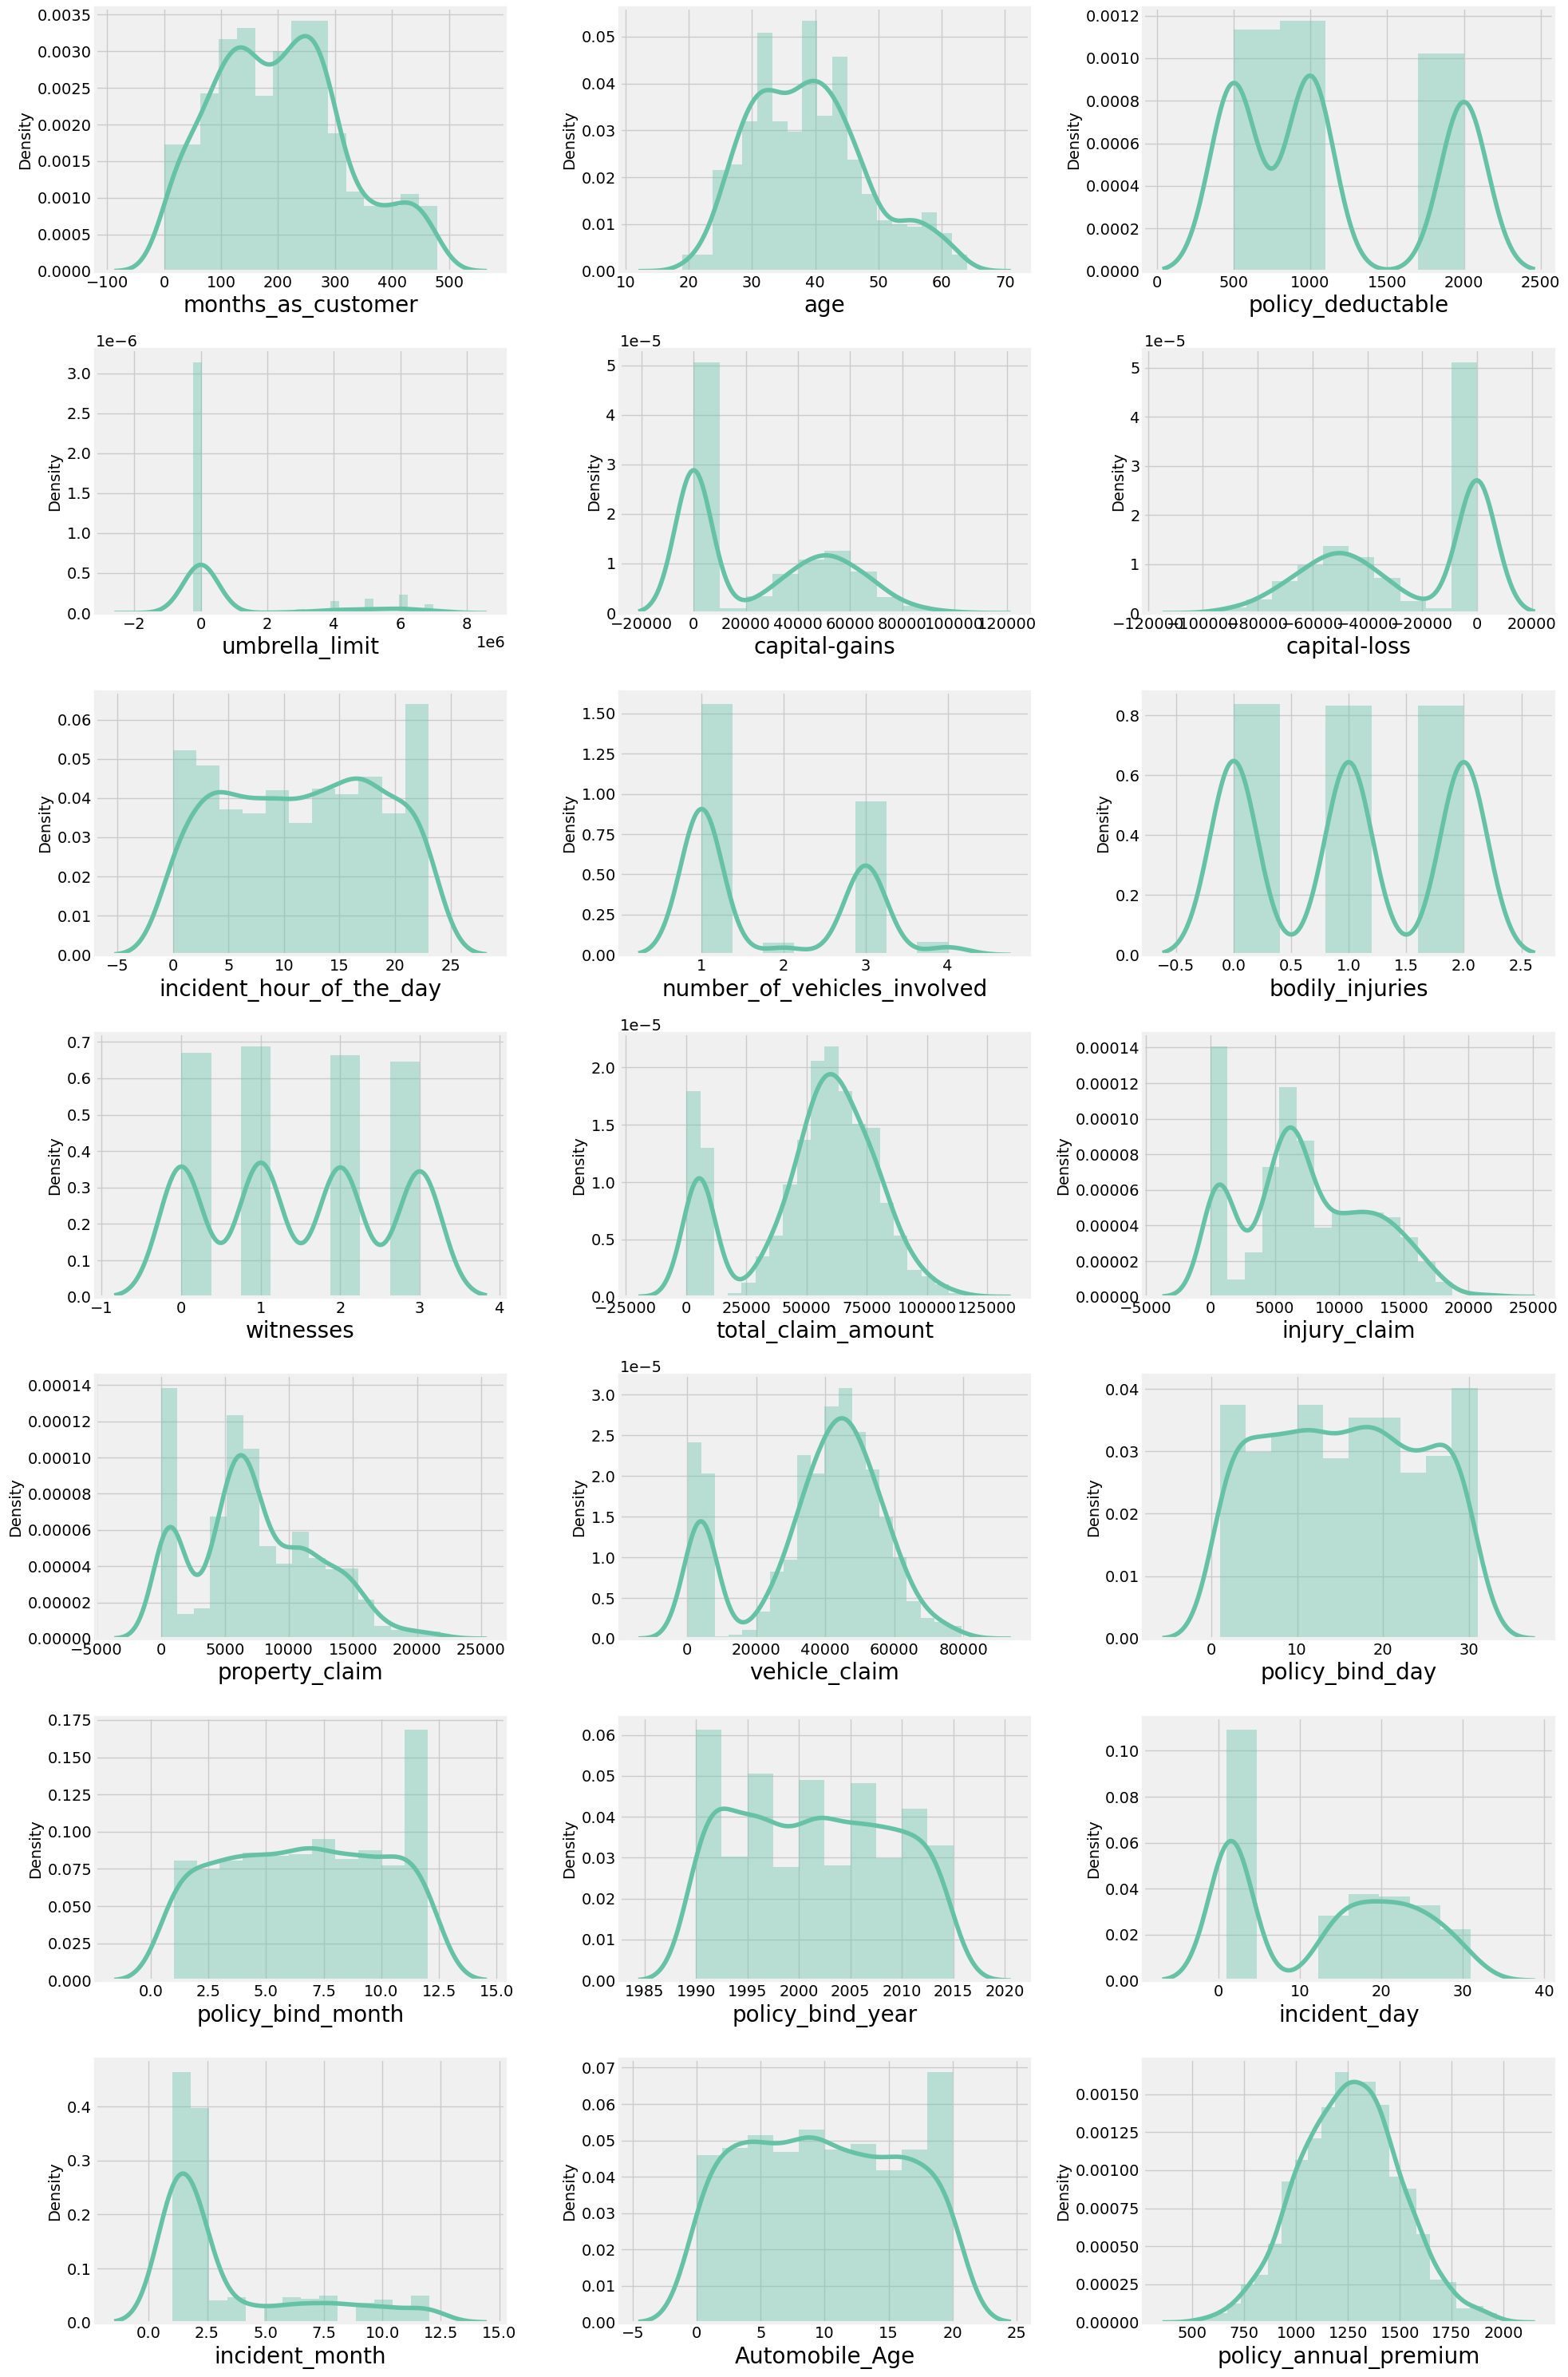

In [58]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('Set2')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.**

- **We also going to ignore sknewness in target feature.**

In [59]:
df[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.028152
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_day                   0.055443
incident_month                 1.388336
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

- **Out above features 'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data. The variable 'incident_month' is skewed but it is discrete in nature.So ignore it.**

- **We will use yeo-johnson method to transform negatively skewed data.**

In [60]:
skew=['total_claim_amount','vehicle_claim']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

df[skew] = scaler.fit_transform(df[skew].values)

<font size='4'>**Check Skewness after Transformation**

In [61]:
df[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

- **For 'total_claim_amount','vehicle_claim' skewness has not been removed but it got reduced.**

<font size='5'>**Correlation**

In [62]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922960     -0.007183   
age                                    0.922960  1.000000     -0.020012   
policy_state                          -0.007183 -0.020012      1.000000   
policy_deductable                      0.031041  0.032036      0.017612   
policy_annual_premium                 -0.003814  0.005330      0.015089   
umbrella_limit                         0.018213  0.013256     -0.010921   
insured_sex                            0.059644  0.073790     -0.018002   
insured_education_level               -0.000731  0.001647     -0.027173   
insured_occupation                     0.006925  0.014798     -0.025357   
insured_hobbies                       -0.089358 -0.079099     -0.039501   
insured_relationship                   0.071492  0.076129     -0.017060   
capital-gains                          0.007468 -0.004529      0.068619   
capital-loss                           0.023041  0.012860     -0.031926   
incident_type                         -0.016746 -0.026286      0.032373   
collision_type                        -0.073031 -0.076325      0.049961   
incident_severity                     -0.064094 -0.064396     -0.028353   
authorities_contacted                  0.013782  0.018441     -0.014647   
incident_state                         0.015811  0.012644      0.019456   
incident_city                         -0.006601 -0.006685     -0.002809   
incident_hour_of_the_day               0.066198  0.083720      0.021926   
number_of_vehicles_involved            0.011831  0.020391     -0.045514   
property_damage                       -0.000630 -0.008239     -0.013576   
bodily_injuries                       -0.007674 -0.012254      0.012097   
witnesses                              0.063574  0.056360      0.025838   
police_report_available               -0.017200 -0.018135      0.065316   
total_claim_amount                     0.059338  0.068448     -0.015056   
injury_claim                           0.065062  0.077149     -0.048188   
property_claim                         0.036660  0.062375     -0.006420   
vehicle_claim                          0.056360  0.059129     -0.006411   
auto_make                              0.049734  0.033757      0.010259   
auto_model                             0.005130  0.015322     -0.018008   
fraud_reported                         0.021285  0.013279      0.034587   
CSL_Personal                          -0.021855 -0.013323      0.001653   
CSL_Accidental                         0.007121  0.011258      0.029007   
policy_bind_day                        0.050824  0.053147     -0.000583   
policy_bind_month                      0.004207  0.014492      0.073692   
policy_bind_year                      -0.041914 -0.031709     -0.003045   
incident_day                          -0.010538 -0.005843      0.016049   
incident_month                         0.019242  0.018221      0.027889   
Automobile_Age                        -0.000869 -0.005594      0.001160   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.031041              -0.003814   
age                                   0.032036               0.005330   
policy_state                          0.017612               0.015089   
policy_deductable                     1.000000              -0.008300   
policy_annual_premium                -0.008300               1.000000   
umbrella_limit                        0.013471              -0.014107   
insured_sex                          -0.006977               0.041312   
insured_education_level               0.014101              -0.021400   
insured_occupation                   -0.053888               0.027827   
insured_hobbies                      -0.001923              -0.014226   
insured_relationship                 -0.019000               0.004417   
capital-gains                         0.031673              -0.006807   
capi

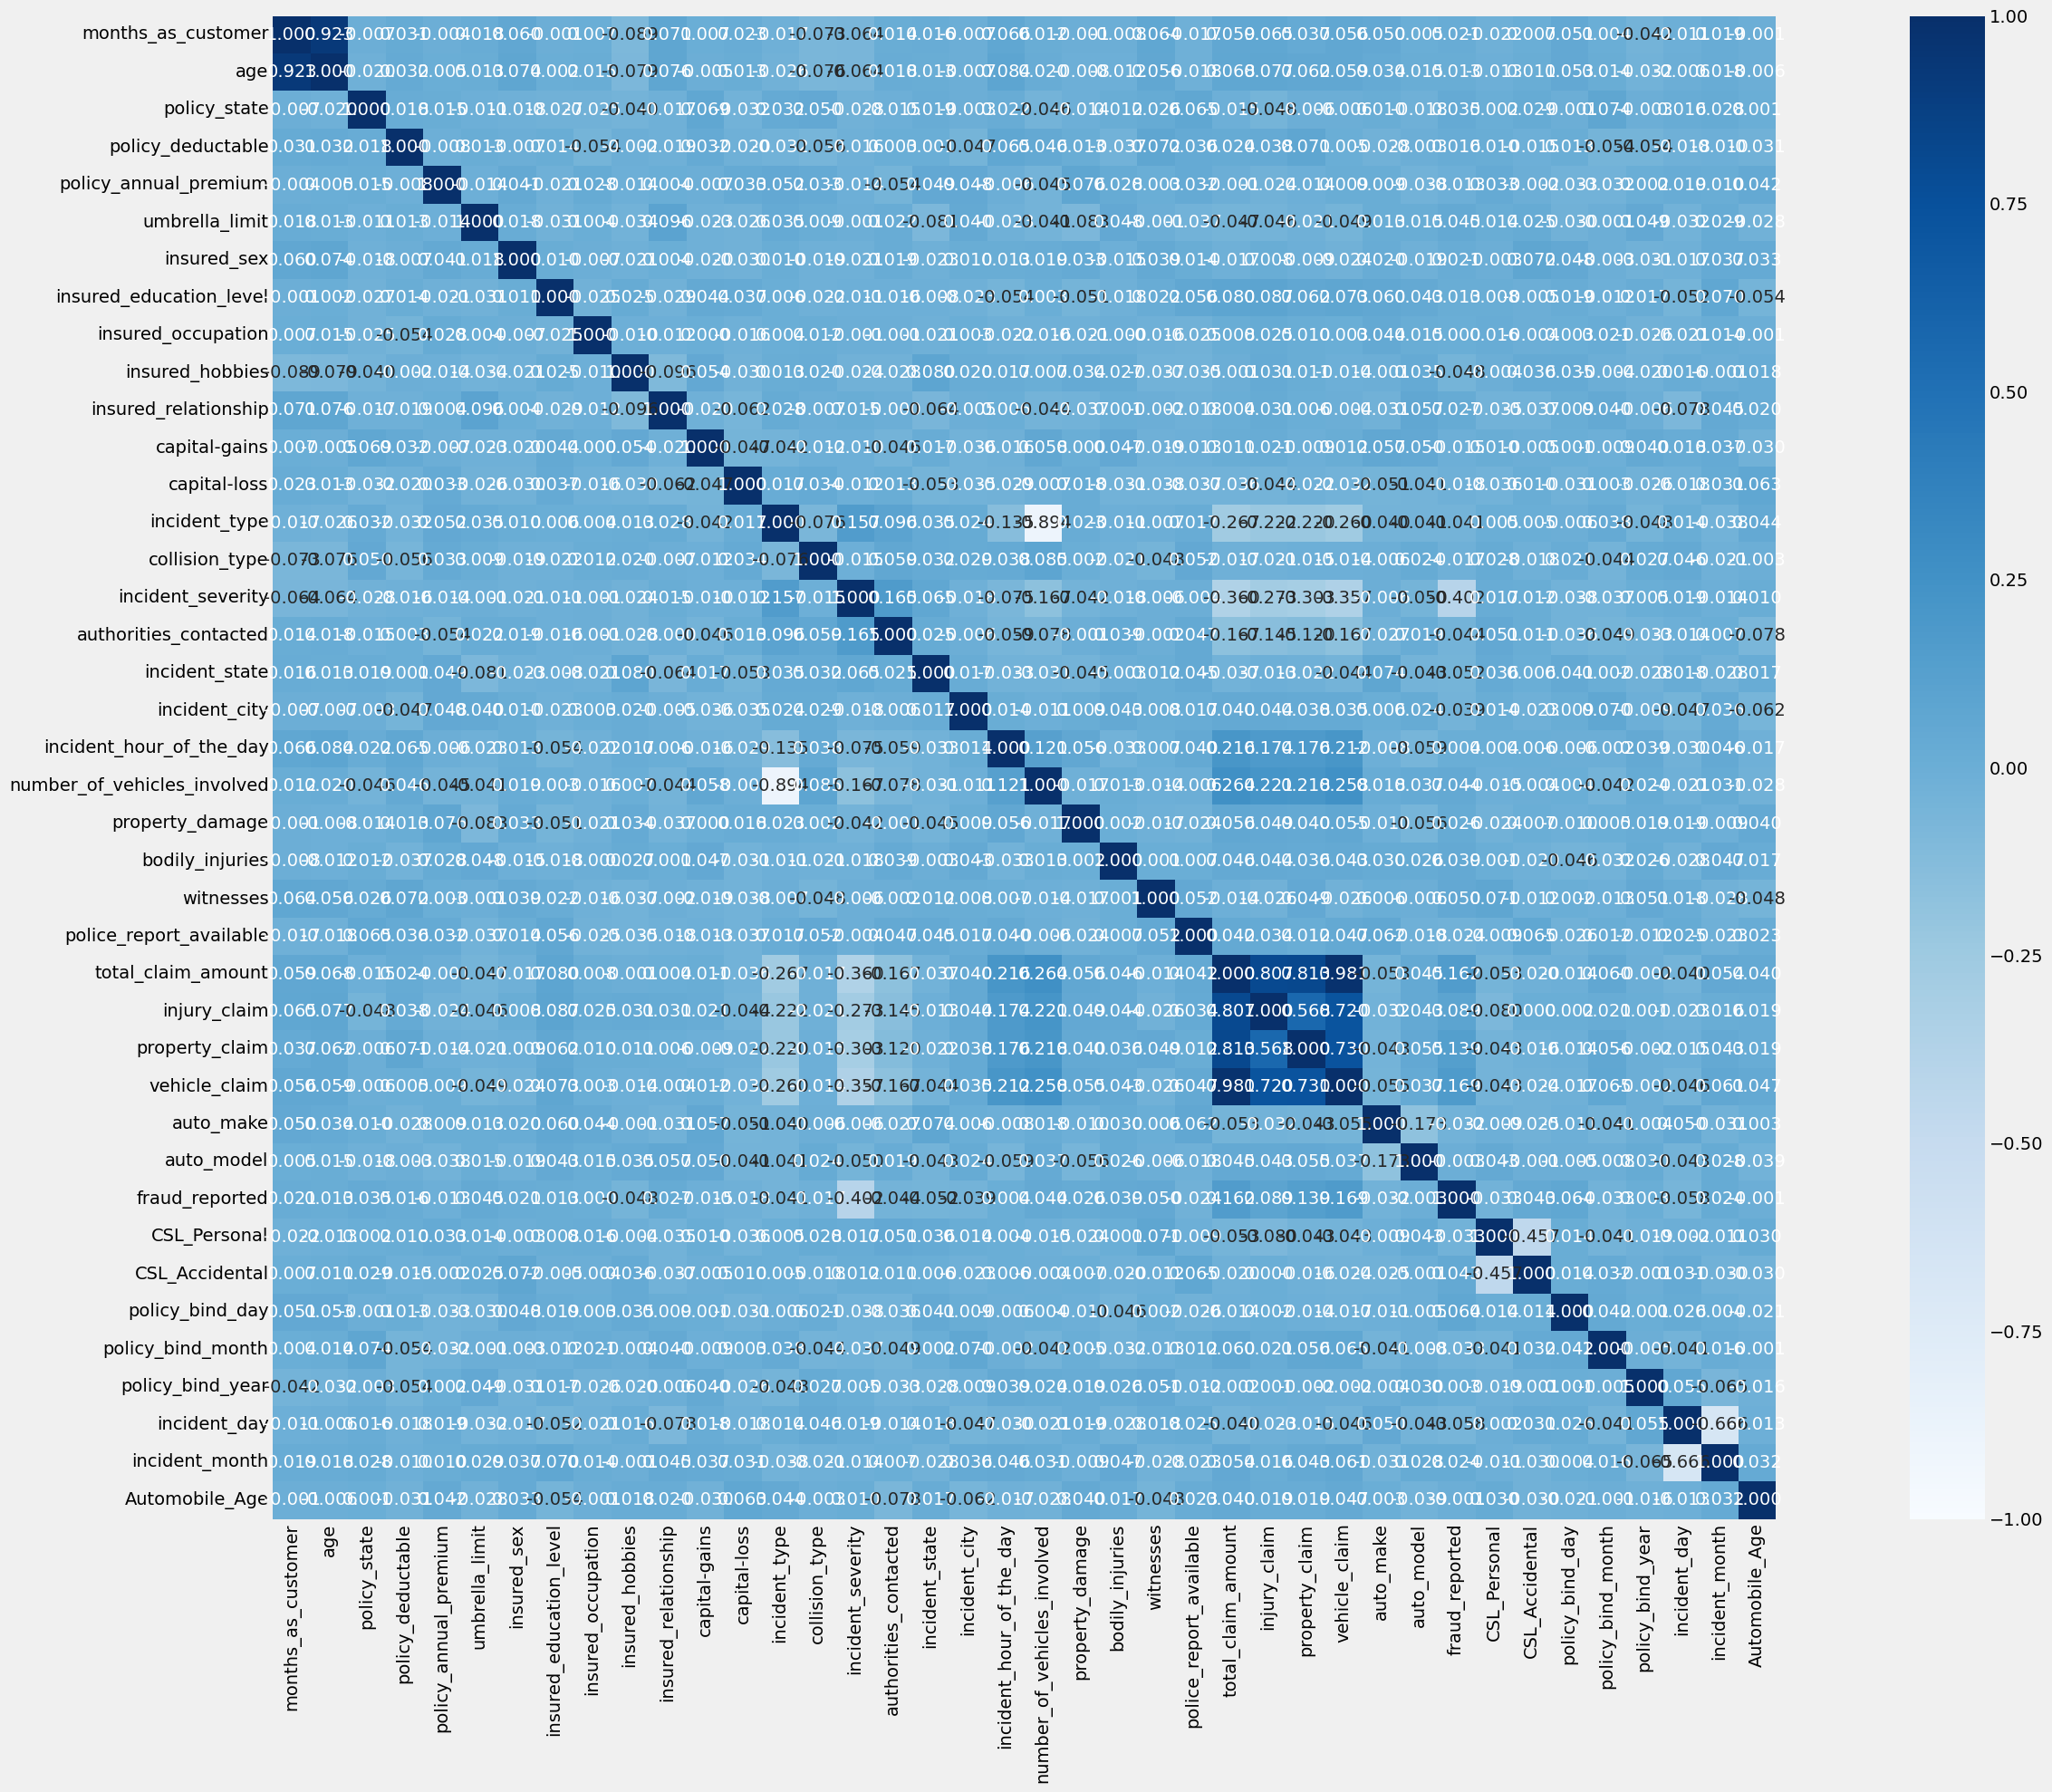

In [63]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="Blues")
plt.show()

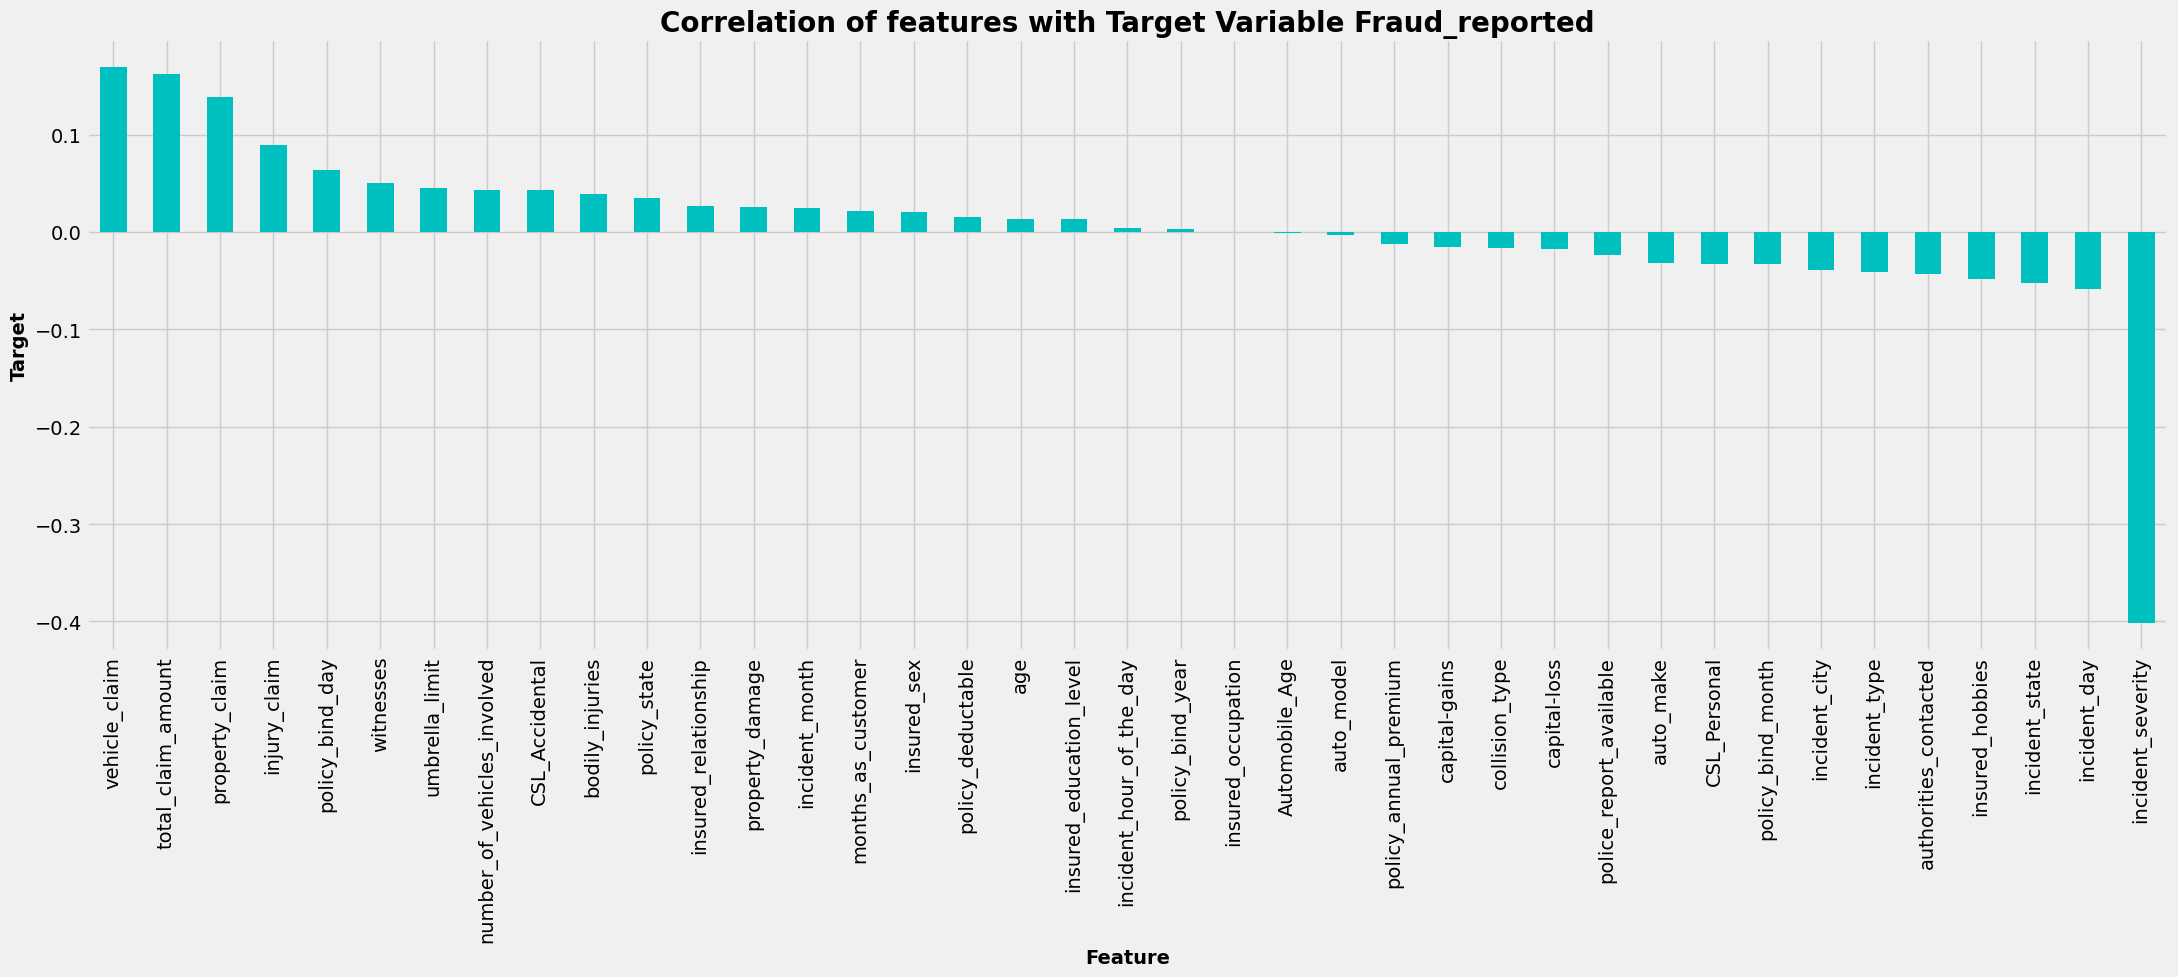

In [64]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

<font size='4'>**Observations :-**

- **incident_severity is correlated with target variable with correlation of 0.4. Other variable are poorly correlated with target variable.**

- Other variable are poorly correlated with target variable.

- injury_claim,property_claim,vehicle_claim are highly correlated with each other.

- **incident_hour_of_the_day is highly negative correlated with incident type.**

In [65]:
df.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

- **As Target variable data is Imbalanced in nature we will need to balance target variable.**

<font size='5'>**SMOTE**

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [68]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [69]:
Y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

**We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.**

<font size='4'>**Standard Scalling**

In [70]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

<font size='5'>**VIF(Variance_Inflation_Factor)**

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values                     Features
0       7.476818           months_as_customer
1       7.449581                          age
2       1.070765                 policy_state
3       1.058818            policy_deductable
4       1.048879        policy_annual_premium
5       1.050942               umbrella_limit
6       1.083487                  insured_sex
7       1.062598      insured_education_level
8       1.030731           insured_occupation
9       1.059248              insured_hobbies
10      1.060021         insured_relationship
11      1.069694                capital-gains
12      1.064117                 capital-loss
13      3.706392                incident_type
14      1.091251               collision_type
15      1.364624            incident_severity
16      1.120851        authorities_contacted
17      1.067233               incident_state
18      1.067784                incident_city
19      1.111792     incident_hour_of_the_day
20      3.570353  number_of_vehicles_involved
21      1.066665              property_damage
22      1.058977              bodily_injuries
23      1.073641                    witnesses
24      1.105547      police_report_available
25  42337.678175           total_claim_amount
26   1688.605029                 injury_claim
27   1690.448413               property_claim
28  21114.280358                vehicle_claim
29      1.088688                    auto_make
30      1.079812                   auto_model
31      1.245467                 CSL_Personal
32      1.198354               CSL_Accidental
33      1.037981              policy_bind_day
34      1.060349            policy_bind_month
35      1.038275             policy_bind_year
36      1.822892                 incident_day
37      1.828128               incident_month
38      1.063140               Automobile_Age

**Strategy to Address Multicollinearity :-**

- Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.

- Another way to address Multicollinerity is to Scaled Data and then apply PCA.


**We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.**

<font size='5'>**PCA**

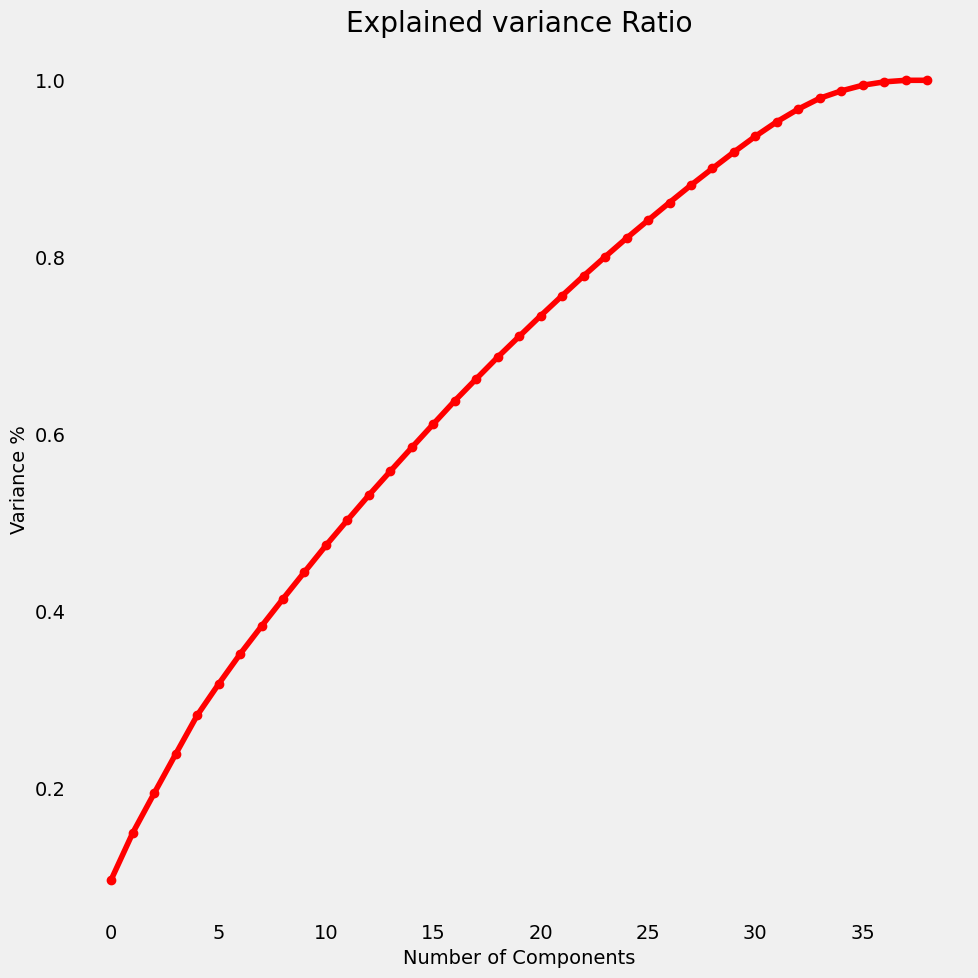

In [72]:
from sklearn.decomposition import PCA
pca = PCA()

x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

**AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction.**

In [73]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [74]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

<font size='5'>**Machine Learning (ML) Model**

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1036, 28)
Training target vector size: (1036,)
Test feature matrix size: (444, 28)
Test target vector size: (444,)


<font size='4'>**Find best Random State**

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8130630630630631 on Random_state 222


<font size='4'>**Logistic Regression**

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=222, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8130630630630631


Confusion matrix of Logistics Regression : 
 [[180  37]
 [ 46 181]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       217
           1       0.83      0.80      0.81       227

    accuracy                           0.81       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.81      0.81      0.81       444



<font size='4'>**Find Optimal value of n_neighbors for KNN**

In [79]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for K = ' , K , 'is:', error)

RMSE value for K =  1 is: 0.4601214097515043
RMSE value for K =  2 is: 0.3970612769556579
RMSE value for K =  3 is: 0.4931969619160719
RMSE value for K =  4 is: 0.45766741140205675
RMSE value for K =  5 is: 0.504484394708602
RMSE value for K =  6 is: 0.47694599010525024
RMSE value for K =  7 is: 0.532713603903433
RMSE value for K =  8 is: 0.504484394708602
RMSE value for K =  9 is: 0.5390181263561927
RMSE value for K =  10 is: 0.517704566348432
RMSE value for K =  11 is: 0.5431804903022982
RMSE value for K =  12 is: 0.5220368976638744
RMSE value for K =  13 is: 0.5369248441712194
RMSE value for K =  14 is: 0.5133356733303399
RMSE value for K =  15 is: 0.5452497568062706
RMSE value for K =  16 is: 0.5220368976638744
RMSE value for K =  17 is: 0.5431804903022982
RMSE value for K =  18 is: 0.5348233690070359
RMSE value for K =  19 is: 0.5534494613840601
RMSE value for K =  20 is: 0.5305954499725111


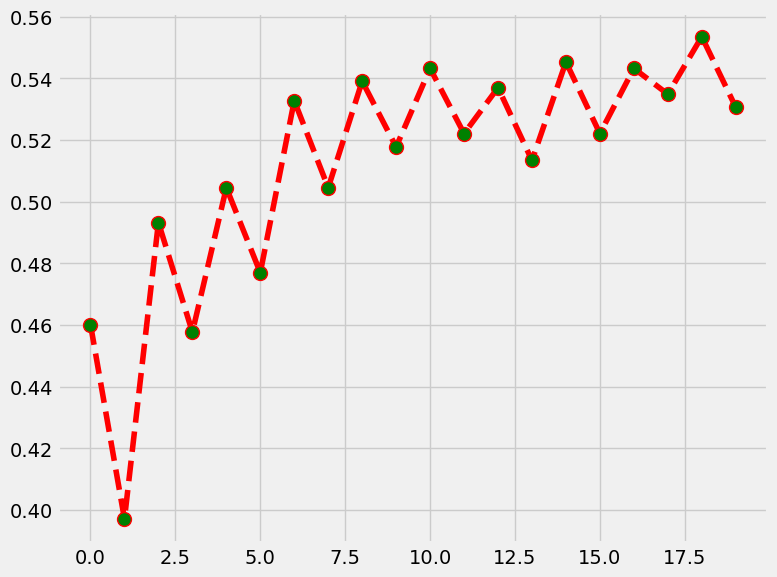

In [80]:
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

- At K = 2, we get the minimum RMSE value which approximately 4218150399498907, and shoots up on further increasing the k value. We can safely say that K = 2 will give us the best result in this case

<font size='4'>**Apply other Classification Algorithm**

In [81]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 2),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('******************************************************************************************************************')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8130630630630631


Confusion matrix : 
 [[180  37]
 [ 46 181]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       217
           1       0.83      0.80      0.81       227

    accuracy                           0.81       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.81      0.81      0.81       444



******************************************************************************************************************
Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8626126126126126


Confusion matrix : 
 [[194  23]
 [ 38 189]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       217
           1       0.89      0.83      0.86       227

    accuracy                           0.

<font size='4'>**Cross Validation**

In [82]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 2),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.61148649 0.69594595 0.80405405 0.84121622 0.85810811]
Mean Score : 0.7621621621621621
Std deviation : 0.09412528368343943




Cross Validation Score SVC() :

Score : [0.58783784 0.71959459 0.875      0.91891892 0.91891892]
Mean Score : 0.8040540540540541
Std deviation : 0.1306170387461407




Cross Validation Score GaussianNB() :

Score : [0.56081081 0.6722973  0.86486486 0.88175676 0.84459459]
Mean Score : 0.7648648648648649
Std deviation : 0.12667071937437832




Cross Validation Score DecisionTreeClassifier() :

Score : [0.55405405 0.61148649 0.76351351 0.75337838 0.77364865]
Mean Score : 0.6912162162162162
Std deviation : 0.09061614431178507




Cross Validation Score KNeighborsClassifier(n_neighbors=2) :

Score : [0.75       0.78040541 0.84797297 0.86148649 0.84121622]
Mean Score : 0.8162162162162161
Std deviation : 0.043243243243243266




Cross Validation Score RandomForestClassifier() :

Score : [0.61486486 0.71959459 

<font size='5'>**Hyper Parameter Tuning :** 
    
    
<font size='3'>**GridSearchCV**

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400],
              'bootstrap' : [True, False]
             }

In [85]:
GCV = GridSearchCV(ExtraTreesClassifier(), param_grid, cv = 5, n_jobs = -1)

In [86]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]})

In [87]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 200}

<font size='4'>**Final Model**

In [88]:
Final_mod = ExtraTreesClassifier(bootstrap = False, criterion = 'gini', n_estimators = 200, max_depth = 30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8671171171171171


<FONT SIZE='4'>**Confusion Matrix**

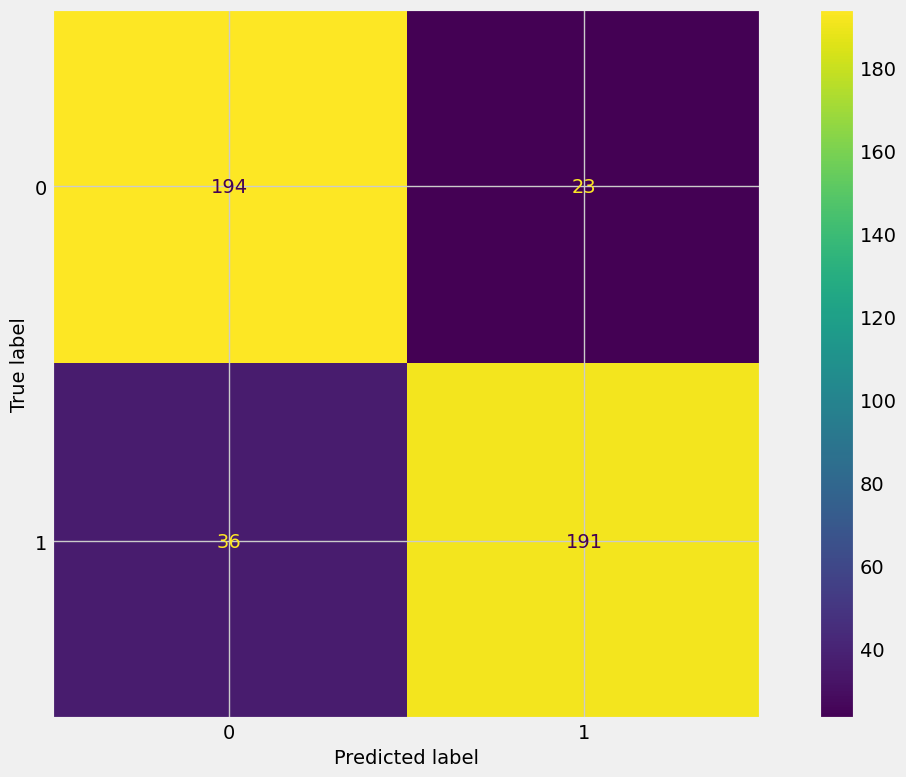

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Matrix = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=Matrix)
disp.plot()
plt.show()

<font size='4'>**ROC CURVE**

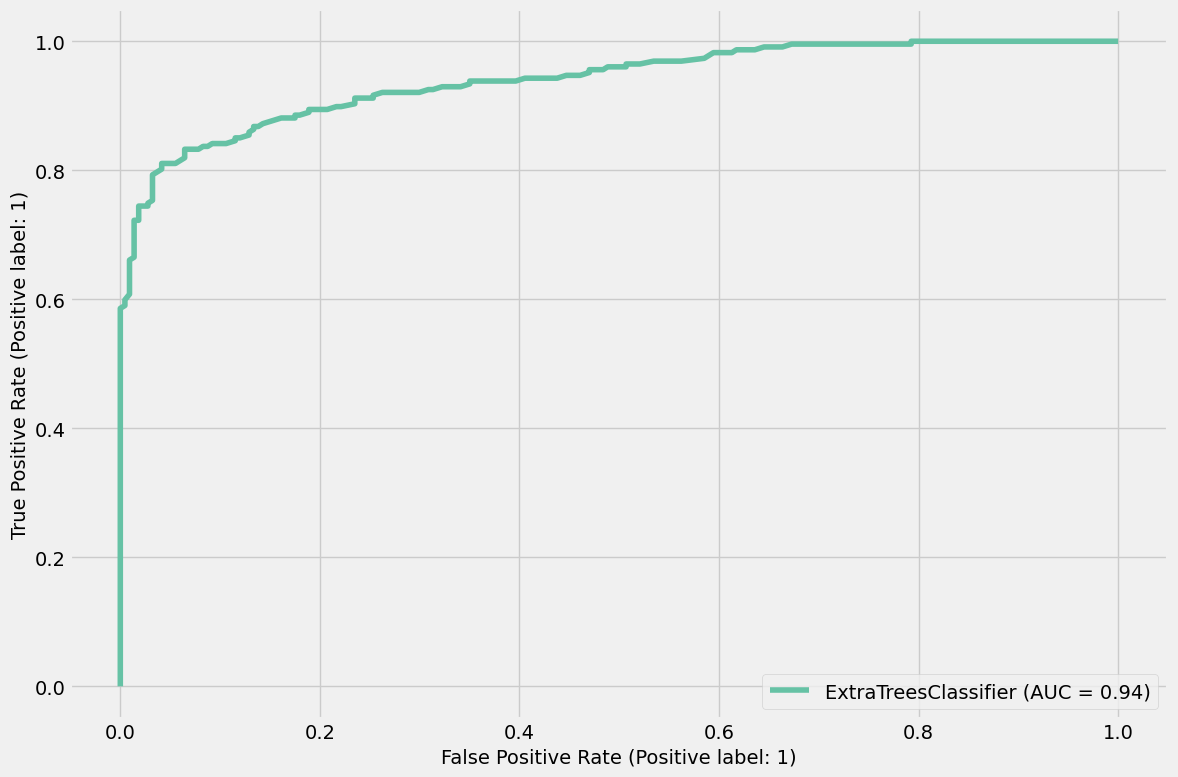

Auc Score :
 0.8677094541099089


In [92]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
RocCurveDisplay.from_estimator(Final_mod,X_test,Y_test)   
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

<font size='4'>**Save the Final Model**

In [93]:
import joblib
joblib.dump(Final_mod,'Insurance_Claims_Fraud_Final.pkl')

['Insurance_Claims_Fraud_Final.pkl']

<font size='4'>**Predict the Final Model**

In [96]:
prediction = Final_mod.predict(X_test)

In [97]:
Original = np.array(Y_test)
df = pd.DataFrame()
df["Original Insurance Claims Fraud"] = Original
df["Predicted Insurance Claims Fraud"] = prediction
df

Original Insurance Claims Fraud  Predicted Insurance Claims Fraud
0                                  1                                 1
1                                  1                                 1
2                                  1                                 1
3                                  0                                 0
4                                  0                                 1
..                               ...                               ...
439                                0                                 1
440                                1                                 1
441                                0                                 1
442                                1                                 1
443                                0                                 0

[444 rows x 2 columns]

<font size='4'>**Insurance Claims Fraud**
    
- **Yes = 1**
    
- **No = 0**